<a href="https://colab.research.google.com/github/Mihirgupta2001/Regression---Capstone-Project/blob/main/Regresssion_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Through rigorous data analysis, it has been observed that some bad news/FUD heavily manipulated the market from 2018, which created a rug pull-like scenario as it was undetected by any indicator we have used in the project, although signs of retracement and capitulation could have been seen through detailed analysis from mid-2018 till 2020, it was a continuous downfall and not a healthy market movement.

Although the indicators did their work, we had seen that the moving average band acted as a support when it was below the price and acted as a resistance when it was above the price, same can be said about the RSI and Bollinger Bands both indicated LONG and SHORT opportunities for traders but MACD was not much of a help in this case as it was primarily green which could have trapped a lot of early investors who didn't book their profits on time and invested seeing the positive momentum of the stock and the same goes for ATR, few spikes were observed after 2017 but we have already concluded that it was a market manipulation, which could not be used for trading perspective.

From hypothesis testing we have concluded 3 major things 




1.   Market is heavily manipulated by the players involved, i.e., valuation of the company is not only determined by the fundamentals of that company, but the traders involved set the prices
2.   One cannot rely on only bollinger bands for there trading strategy, as it can result in loss on there investments, if proper risk management is not done.
3.   Yes bank's stock is very much volatile as we have tested and concluded that nearly 40 percent of the candles formed through inception is atleast covered by 50 percent of wicks in its respective range


The models I have used are  

*   Linear Regression
*   Decision Tree

*   Random Forest
*   Extreme Gradient Boosting


It can been concluded that among the models I have used Linear Regression is giving the best results, i.e. nearly 218 % growth in our portfolio with a threshold value of 1% over the last three years of the data set(testing data). 


# **GitHub Link -**

https://github.com/Mihirgupta2001/Regression---Capstone-Project

# **Problem Statement**


**The objective is to predict Yes Bank stock's closing price of the month**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#installing neccesary libraries
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.7 MB/s eta 0:00:00


In [2]:
# importing the neccesary libraries
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import seaborn as sns
from scipy.stats import *
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [3]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


The Date column is in string format

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    185
dtype: int64

There are no null values/duplicate values in the dataset

Let's move ahead and check other parameters

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Checking the description of the data
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


We can see that mean, standard deviation and all other parameters are close to each other in all the columns, which kind of obvious given each column is a part of candlestick pattern 

### Variables Description 

Date - Date of record

Open - Opening price of the month

High - Highest price of the month

Low - Lowest Price of the month

Close - Closing price of the month

## ***3. Data Wrangling***

In [11]:
# Changing the format of date 
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y'))
df['Date'] = df['Date'].dt.strftime('%Y-%m')
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [12]:
# Setting Date as index
df = df.set_index('Date')
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


We are predicting tommorow's data using today's data so let's shift the close data bny 1 to avoid data leakage into our model

In [13]:
#Shifting our data by 1
df = df.shift(1)
df

,Open,High,Low,Close
Date,,,,
2005-07-01,NaN,NaN,NaN,NaN
2005-08-01,13.00,14.00,11.25,12.46
2005-09-01,12.58,14.88,12.55,13.42
2005-10-01,13.48,14.87,12.27,13.30
2005-11-01,13.20,14.47,12.40,12.99
...,...,...,...,...
2020-07-01,27.75,31.95,25.55,25.60
2020-08-01,25.60,28.30,11.10,11.95
2020-09-01,12.00,17.16,11.85,14.37


## ***4. Data Vizualization, Storytelling & Experimenting with charts***

### Technical Data Analysis

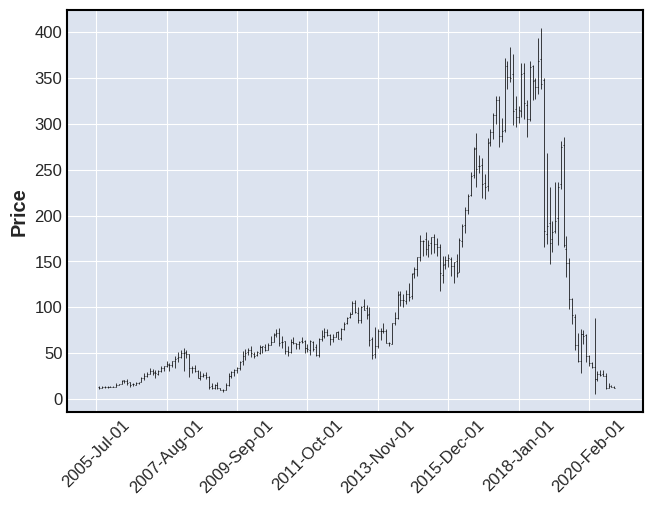

In [14]:
# plotting the given data for stock analysis
mpf.plot(df)

The price seems to be heavily manipulated from Dec 2015, there might be some fundamental news involved

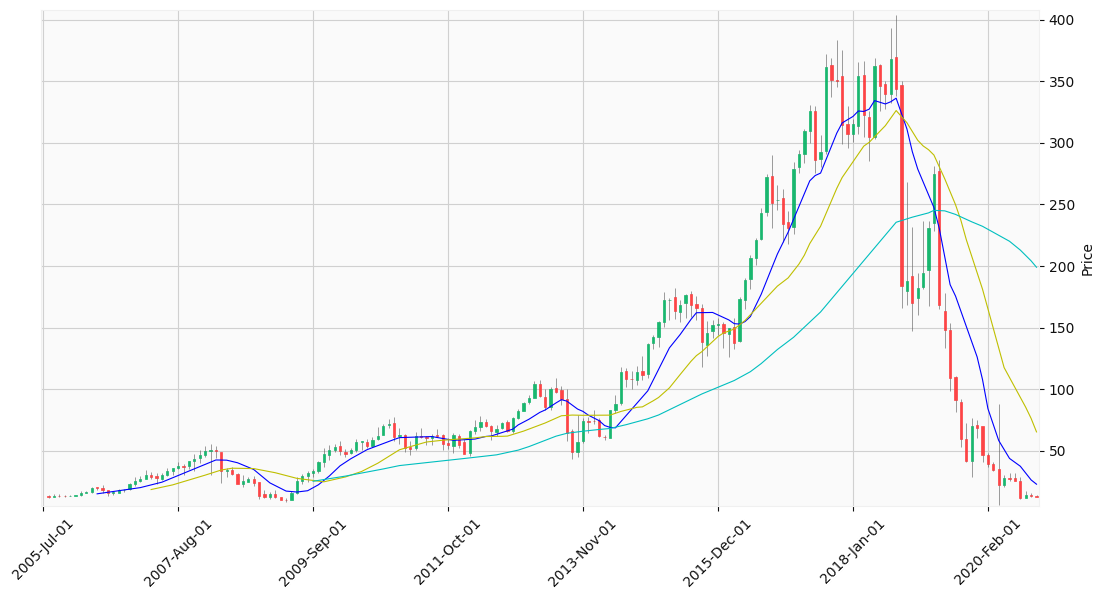

In [15]:
# Plotting the given data in candlestick pattern along with 20 and 50 monthly moving averages
mpf.plot(df,type='candle',
         mav=(10,20,50),style='yahoo',
         tight_layout= True,figratio =(48,24),
         mavcolors = ('b','y','c'))

Let's point the observation we took from this chart



*   Price was making higher highs since the inception until August 2018
*   We saw a triple top pattern forming between 350 to 400 price range, with neckline around 300 which indicates trend reversal

*   Price broke the neckline on September 2018 and attempted a failed retest on March 2019, which was a strong selling/shorting signal for traders.

*   We can see that 20 moving average(blue line) is a good trading indicator for this chart as price rallied up when it was above it and also got suppresed, whenever the support broke
*   It can also be observed that price never spent too much time below 50 moving average and it ultimately always provided a good support for the stock until September 2018

*   At the time of retest on March 2019 for the neckline, the 20 moving average was also there which provided additional resistance to the price.
*   After failing to claim the 20 moving average support, the price further more dumped again, breaking the 50 moving average, thus there was no support confirmation for a bullish reversal








Let's have a look at the line graph of closing price of each month

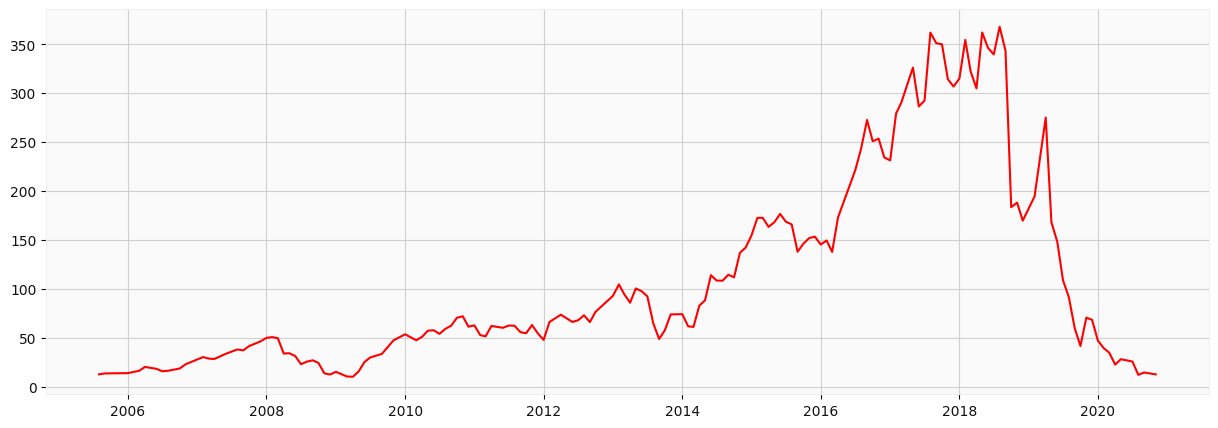

In [16]:
# coding to get the line graph for close price
relevant_df = df['Close']
figure(figsize=(15,5))
plt.plot(relevant_df,color = 'r')

From this chart we can clearly see that the Bulls are getting exhausted in between July 2017 to July 2018 forming multiple tops inbetween 370 to 350 price point

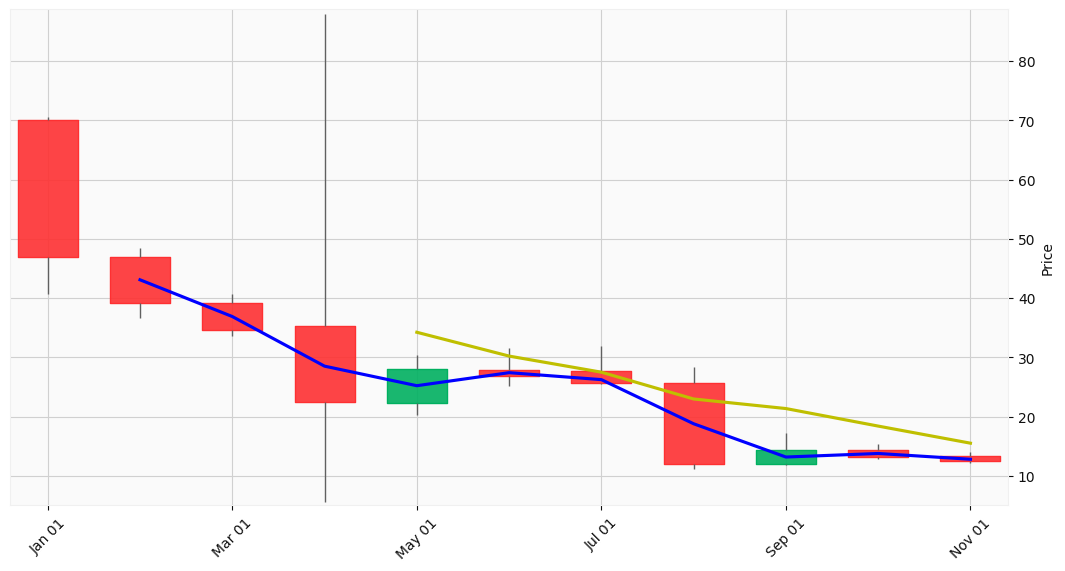

In [17]:
# Having a closer look at the price from 2020 till the end
mpf.plot(df['2020-01' : ],type='candle',
         mav=(2,5),style='yahoo',
         tight_layout= True,figratio =(48,24),
         mavcolors = ('b','y'))

We can see extreme volatility on March 2020, where the price spiked above 80 and also touched below 10, this coule be a result of market manipulation or due to some fundamental news in the market.

Although it can be observed tht market was forming its bottom around 10, having continous bounces from that support zone 

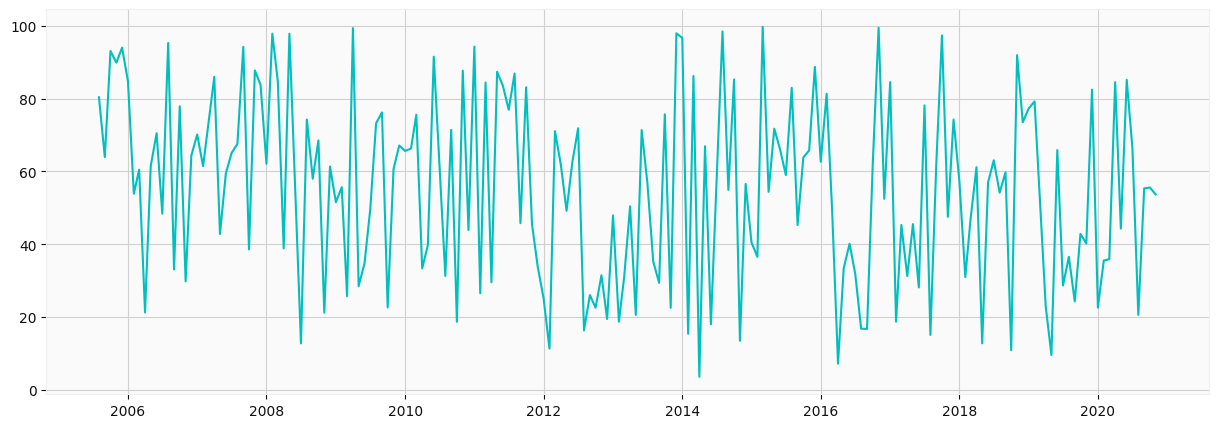

In [18]:
#calculating the range of each candle
df['range'] = df['High'] - df['Low']

#calculating the candle length of each candle
df['gain'] = (df['Close'] - df['Open']).apply(lambda x: x if x > 0 else 0)
df['loss'] = (df['Close'] - df['Open']).apply(lambda x: -x if x < 0 else 0)
df['candle_length'] = df['gain'] + df['loss']

#calculating wicks length of each candle
df['wicks_length'] = df['range'] - df['candle_length']

#calculating percentage of wicks length
df['%_wicks_length'] = (df['wicks_length']/df['range']) * 100

#Plotting the wicks length of the data
relevant_df = df['%_wicks_length']
relevant_df.reset_index()
figure(figsize=(15,5))
plt.plot(relevant_df,color = 'c')


The following line graph shows that wicks length percentage is greater than 50 in many ocassions, which means that the market is very volatile and unsure.  

### INDICATORS

####Moving Average Band

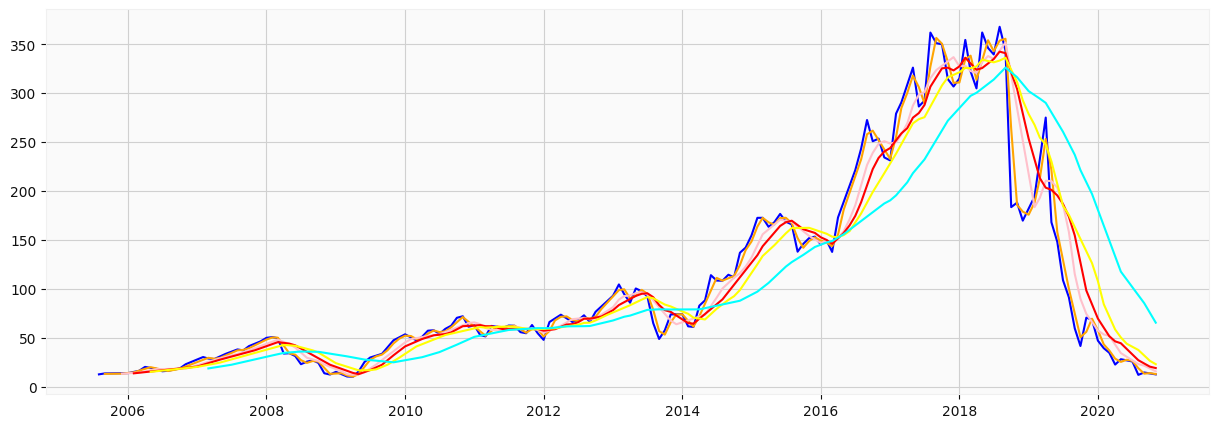

,Open,High,Low,Close,range,gain,loss,candle_length,wicks_length,%_wicks_length,sma_2,sma_5,sma_7,sma_10,sma_20
Date,,,,,,,,,,,,,,,
2005-07-01,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,13.00,14.00,11.25,12.46,2.75,0.00,0.54,0.54,2.21,80.363636,NaN,NaN,NaN,NaN,NaN
2005-09-01,12.58,14.88,12.55,13.42,2.33,0.84,0.00,0.84,1.49,63.948498,12.940,NaN,NaN,NaN,NaN
2005-10-01,13.48,14.87,12.27,13.30,2.60,0.00,0.18,0.18,2.42,93.076923,13.360,NaN,NaN,NaN,NaN
2005-11-01,13.20,14.47,12.40,12.99,2.07,0.00,0.21,0.21,1.86,89.855072,13.145,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,27.75,31.95,25.55,25.60,6.40,0.00,2.15,2.15,4.25,66.406250,26.225,27.480,31.935714,40.375,101.5575
2020-08-01,25.60,28.30,11.10,11.95,17.20,0.00,13.65,13.65,3.55,20.639535,18.775,22.960,26.935714,37.425,93.6725
2020-09-01,12.00,17.16,11.85,14.37,5.31,2.37,0.00,2.37,2.94,55.367232,13.160,21.344,23.388571,31.817,85.3035


In [19]:
#making columns of different possible moving averages
df['sma_2'] = df['Close'].rolling(2).mean()
df['sma_5'] = df['Close'].rolling(5).mean()
df['sma_7'] = df['Close'].rolling(7).mean()
df['sma_10'] = df['Close'].rolling(10).mean()
df['sma_20'] = df['Close'].rolling(20).mean()


#Visualizing with different moving averages
plt.figure(figsize=(15,5))
plt.plot(df['Close'],color='blue')
plt.plot(df['sma_2'],color='orange')
plt.plot(df['sma_5'],color='pink')
plt.plot(df['sma_7'],color='red')
plt.plot(df['sma_10'],color='yellow')
plt.plot(df['sma_20'],color='cyan')
plt.show()
display(df)

We can see that the moving average bands are acting as a support and resistance from time to time in the charts, although it must be noted that moving averages are lagging indicators

####MACD

In [20]:
#Calculaating MACD and its signal
shortEMA = df['Close'].ewm(span=12,adjust=False).mean()
longEMA = df['Close'].ewm(span=26,adjust=False).mean()
MACD = shortEMA - longEMA
signal=MACD.ewm(span=9,adjust=False).mean()
df['MACD'] = MACD
df['MACD_signal'] = signal


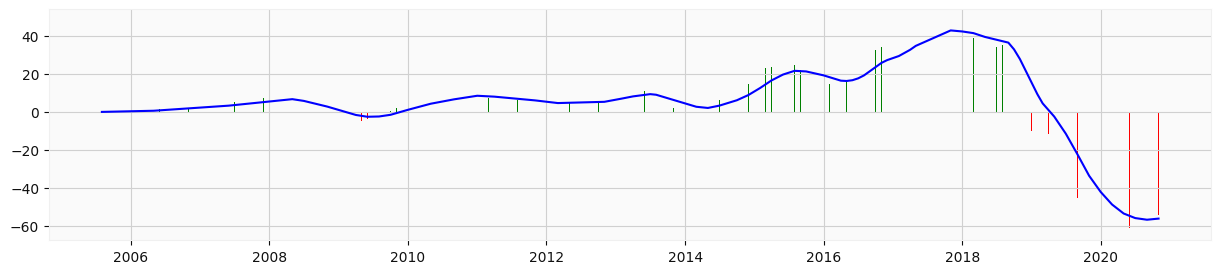

In [21]:
#Plotting MACD
x = df.index
plt.figure(figsize=(15,3))
colors = np.array(['green']*len(df['MACD']))
colors[df['MACD']<0] = 'red'
plt.bar(x,df['MACD'],color=colors)
plt.plot(df['MACD_signal'],color = 'blue')

It can be observed that MACD signal experienced a highly volatile data, as MACD is a lagging indicator, it changes with the current price action

####Relative Strength Index

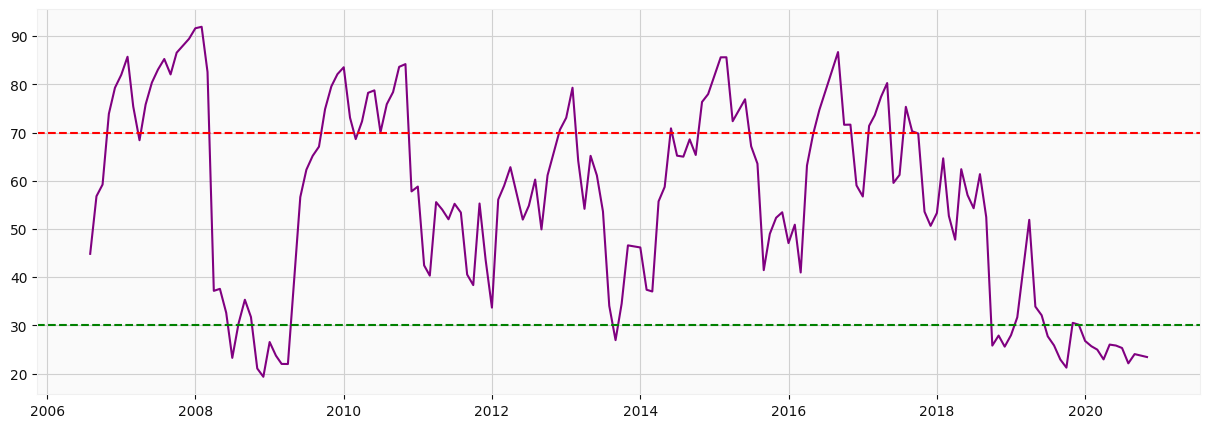

In [22]:
#setting up period for RSI
rsi_period = 14

#to calculate RSI, we first need to calculate the exponential weighted average gain and loss during the period
df['ema_gain']=df['gain'].ewm(span=rsi_period,min_periods=rsi_period).mean()
df['ema_loss']=df['loss'].ewm(span=rsi_period,min_periods=rsi_period).mean()

# The relative strength is the ratio between exponetial average gain divided by the exponential average loss
df['rs'] = df['ema_gain']/df['ema_loss']

# The RSI is calculated using the relative strength by the following formula
df['rsi_14'] = 100 - (100/(df['rs'] + 1))


# adding oversold and overbought levels
overbought_level = 70
oversold_level = 30


#Showing the RSI indicator
relevant_df = df['rsi_14']
figure(figsize=(15,5))
plt.plot(relevant_df,color = 'purple')
plt.axhline(y = overbought_level, color = 'r', linestyle = '--')
plt.axhline(y = oversold_level, color = 'g', linestyle = '--')

We can see that in previos years selling and buying around RSI signal is profitable as it swings between 70 to 30

RSI and charts are suppose to move hand in hand, we can see that RSI top off on August 2016, but we saw our All time high on July 2017

Thus, this made a hidden bearish divergence in the chart which was continued till July 2018 after which the price colapsed.

####Average True Range

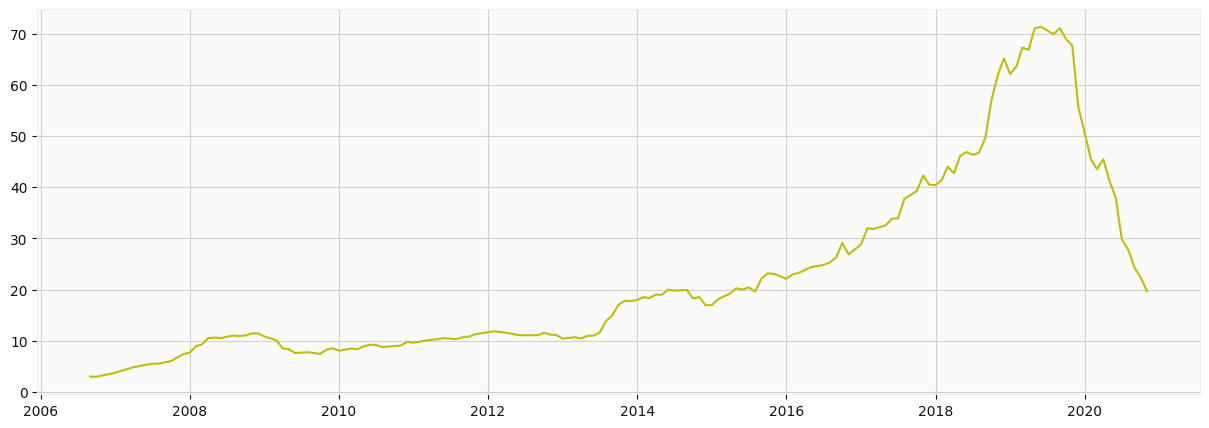

In [23]:
#defining ATR period
atr_period = 14

#calculating the average value of the ranges 
df['atr_14'] = df['range'].rolling(atr_period).mean()

#plotting the ATR indicator
relevant_df = df['atr_14']
figure(figsize=(15,5))
fig_atr = plt.plot(relevant_df,color = 'y')
display(fig_atr)

We can check volatility using ATR

Few major spikes between 2018 till the end is observed  

####Bollinger Bands

In [24]:
# Adding the values for simple moving average in the data frame
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma
df['sma_20'] = sma(df['Close'], 20)
df.tail()

,Open,High,Low,Close,range,gain,loss,candle_length,wicks_length,%_wicks_length,...,sma_7,sma_10,sma_20,MACD,MACD_signal,ema_gain,ema_loss,rs,rsi_14,atr_14
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,27.75,31.95,25.55,25.60,6.40,0.00,2.15,2.15,4.25,66.406250,...,31.935714,40.375,101.5575,-59.463835,-55.753045,3.688517,10.891887,0.338648,25.297768,29.782143
2020-08-01,25.60,28.30,11.10,11.95,17.20,0.00,13.65,13.65,3.55,20.639535,...,26.935714,37.425,93.6725,-58.885129,-56.379462,3.196715,11.259636,0.283909,22.112874,27.796429
2020-09-01,12.00,17.16,11.85,14.37,5.31,2.37,0.00,2.37,2.94,55.367232,...,23.388571,31.817,85.3035,-57.567624,-56.617094,3.086486,9.758351,0.316292,24.029001,24.243571
2020-10-01,14.30,15.34,12.75,13.15,2.59,0.00,1.15,1.15,1.44,55.598456,...,20.331429,26.302,76.2460,-55.976671,-56.489010,2.674955,8.610571,0.310659,23.702525,22.367857
2020-11-01,13.30,14.01,12.11,12.42,1.90,0.00,0.88,0.88,1.02,53.684211,...,18.898571,22.849,65.3070,-54.150521,-56.021312,2.318294,7.579828,0.305850,23.421553,19.700000


In [25]:
#Calculation for bollinger bands
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb
df['upper_bb'], df['lower_bb'] = bb(df['Close'], df['sma_20'], 20)
df.tail()

,Open,High,Low,Close,range,gain,loss,candle_length,wicks_length,%_wicks_length,...,sma_20,MACD,MACD_signal,ema_gain,ema_loss,rs,rsi_14,atr_14,upper_bb,lower_bb
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,27.75,31.95,25.55,25.60,6.40,0.00,2.15,2.15,4.25,66.406250,...,101.5575,-59.463835,-55.753045,3.688517,10.891887,0.338648,25.297768,29.782143,257.250356,-54.135356
2020-08-01,25.60,28.30,11.10,11.95,17.20,0.00,13.65,13.65,3.55,20.639535,...,93.6725,-58.885129,-56.379462,3.196715,11.259636,0.283909,22.112874,27.796429,250.811870,-63.466870
2020-09-01,12.00,17.16,11.85,14.37,5.31,2.37,0.00,2.37,2.94,55.367232,...,85.3035,-57.567624,-56.617094,3.086486,9.758351,0.316292,24.029001,24.243571,240.508729,-69.901729
2020-10-01,14.30,15.34,12.75,13.15,2.59,0.00,1.15,1.15,1.44,55.598456,...,76.2460,-55.976671,-56.489010,2.674955,8.610571,0.310659,23.702525,22.367857,225.705570,-73.213570
2020-11-01,13.30,14.01,12.11,12.42,1.90,0.00,0.88,0.88,1.02,53.684211,...,65.3070,-54.150521,-56.021312,2.318294,7.579828,0.305850,23.421553,19.700000,198.111610,-67.497610


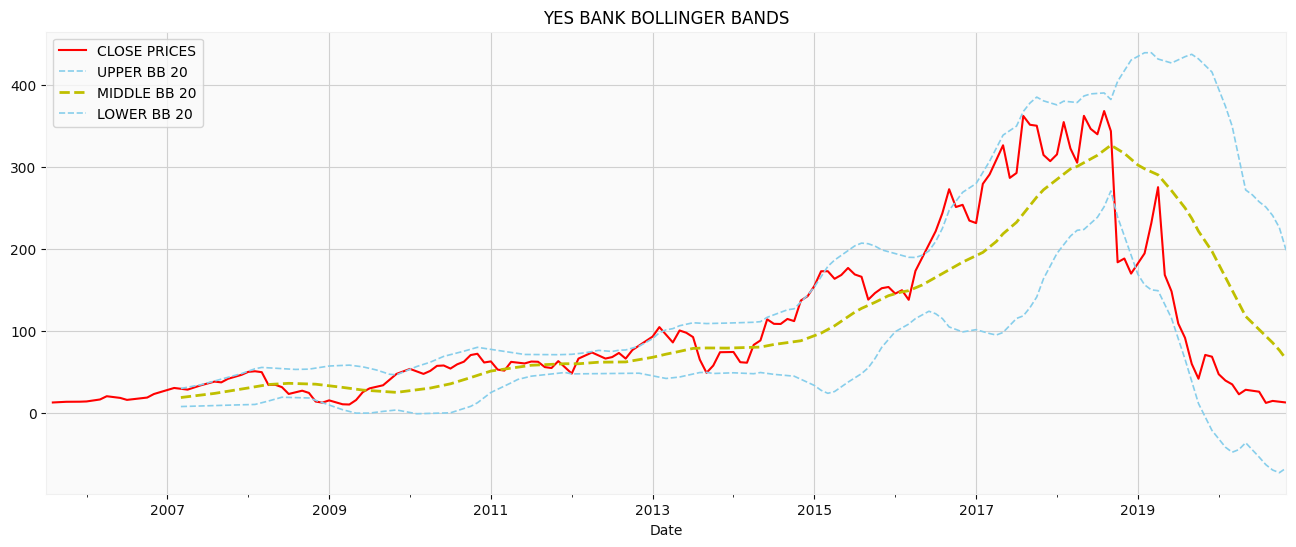

In [26]:
# Plotting boolinger bands indicator
plt.figure(figsize=(16,6))
df['Close'].plot(label = 'CLOSE PRICES', color = 'red')
df['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1.2, color = 'skyblue')
df['sma_20'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 2, color = 'y')
df['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1.2, color = 'skyblue')
plt.legend(loc = 'upper left')
plt.title('YES BANK BOLLINGER BANDS')
plt.show()

We can see that lower and upper BB works as a support and resistance from time to time, so it is fair to trade inbetween them as the price always has a tendeny to come close to 20 moving average, if it deflects to much a bollinger squeeze is taking place.

We can also see that when the collapse of yesbank started, the price tanked from 375 to 169 but as the deviation was too much, a bollinger squeeze took place which pumped the price to 275, ultimately confirming it as a resistance before further collapse

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [27]:
#helper functions 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [28]:
#calculating variance
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)

In [29]:
#creating instance of the class
findz = findz()

In [30]:
#creating a function 
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

In [31]:
zcdf = lambda x: norm(0,1).cdf(x)

In [32]:
def p_value(z,tailed):
  z=zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

### Hypothetical Statement - 1

#### 1. From the relative strength index we can determine wheather bears are controlling the market or the bulls are, for the market to be ideal RSI should be 50, if it is greater than 50, then the market is mainly controlled by bulls and if it is less than 50 then the market is controlled by bears, we want to check wheather the market is mostly controlled on either side or it remained constant throughout

We are testing

        H0 ▶ ℳ = 50  
        
           vs 
           
        H1 ▶ ℳ != 50

Our null hypothesis in this case is the mean of relative strength index is 50

Alternate hypothesis is basically that mean of relative strength index is not 50

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
relevant_df = df['rsi_14'].copy()
hypothesis_mean = 50
size = 36

relevant_df = relevant_df[-36:]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = findz.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'d') #both tailed test
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 5.132454873169293e-10


Thus we can see that market is heavily manipulated by the players involved

##### Which statistical test have you done to obtain P-Value?

I have calculated z-score for mean when standard deviation was known to obtain my p-value

##### Why did you choose the specific statistical test?

From the data I could get the standard deviation required to perform the test on any sample and i was testing mean so z-score was the choice to go for.

### Hypothetical Statement - 2

#### 1. Bollinger bands are used as a trading strategy, in numerous cases, acoording to risk management, it is generally not advised to take more than 2.5% risk in a trade. The motive is to check that wheather the price breaking the bollinger bands is greater than 2.5% or not

We are testing

        H0 ▶ θ = 0.025  
        
           vs 
           
        H1 ▶ θ > 0.025

Our null hypothesis in this case is that closing price is breaking bollinger bands for less than or equal to 2.5% of the times

Alternate hypothesis is basically that closing price is breaking bollinger bands for greater than 2.5% of the times

In [34]:
#Creating a relevant dataframe to test our hypothesis
relevant_df = df[['Close','lower_bb','upper_bb']].copy()
relevant_df = relevant_df[-36:]
relevant_df['Flag'] = 0
for i in range(36):
  if (relevant_df['Close'][i]<relevant_df['lower_bb'][i]):
    relevant_df['Flag'][i] = 1
  elif (relevant_df['Close'][i]>relevant_df['upper_bb'][i]):
    relevant_df['Flag'][i] = 1
relevant_df.Flag.value_counts()

0    33
1     3
Name: Flag, dtype: int64

#### 2. Perform an appropriate statistical test.

In [35]:
abnormalies = relevant_df.Flag.sum()
p_hyp = 0.025
p_sample = abnormalies/36
size = 36
z = findz.proportion(p_sample,p_hyp,size)
p = p_value(z,'r') #right tailed
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.012487339646527151


This clearly means that more than 2.5 percent of the times the value is breaking bollinger bands, thus it is not an indicator we can totally rely on although adding a bunch more indicators with this could give favourable outcomes

##### Which statistical test have you done to obtain P-Value?

I have calculated z-score

##### Why did you choose the specific statistical test?

It was the only known statistical test for proportions

### Hypothetical Statement - 3

#### 1. I want to check that wheather the market is heavily manipulated by news, i.e., if the volatility or the wicks of the candle is 50% of the total range of the candle and we find that atleast 40% of such candles exist in our data, then we will conclude that market is manipulated by news

We are testing

        H0 ▶ θ = 0.40  
        
           vs 
           
        H1 ▶ θ > 0.40

Null hypothesis in this case is that 40 percent or less, of the candles in our chart consists of atleast 50 percent wicks 

Alternate hypothesis is that more than 40 percent of the candles in our chart consists of atleast 50 percent wicks 

In [36]:
relevant_df = df[['%_wicks_length']].copy()
relevant_df = relevant_df[-36:]
relevant_df['Flag'] = 0
for i in range(36):
  if (relevant_df['%_wicks_length'][i]>50):
    relevant_df['Flag'][i] = 1
relevant_df.Flag.value_counts()

1    20
0    16
Name: Flag, dtype: int64

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
abnormalies = relevant_df.Flag.sum()
p_hyp = 0.4
p_sample = abnormalies/36
size = 36
z = findz.proportion(p_sample,p_hyp,size)
p = p_value(z,'r') #right tailed
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.028379723193006745


This clearly means that market is heavily manipulated by news as near about 40 percent of the candles have 50 percent wicks in there entire month's price range

##### Which statistical test have you done to obtain P-Value?

z-score is used to obtain p-value

##### Why did you choose the specific statistical test?

It was the only known statistical test for proportions

### Hypothetical Statement - 4

#### 1. We are testing if our data is seasonal or not

Null hypothesis in this case is that our data is not stationary 

Alternate hypothesis is that our data is stationary

In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
def adfuller_test(series):
    result=adfuller(series)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

#### 2. Perform an appropriate statistical test.

It is safe to reject the null hypothesis and say that our data is seasonal as p-value is 0.05

In [40]:
adfuller_test(df['Close'].dropna())

ADF Test Statistic : -1.9098580292051737
p-value : 0.32743788865403467
Lags Used : 14
Number of Observations Used : 169
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


As the data is seasonal, let's try to get the seasonal difference

In [41]:
df['Seasonal First Difference']=df['Close']-df['Close'].shift(15)
df.head(16)

,Open,High,Low,Close,range,gain,loss,candle_length,wicks_length,%_wicks_length,...,MACD,MACD_signal,ema_gain,ema_loss,rs,rsi_14,atr_14,upper_bb,lower_bb,Seasonal First Difference
Date,,,,,,,,,,,,,,,,,,,,,
2005-07-01,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,13.00,14.00,11.25,12.46,2.75,0.00,0.54,0.54,2.21,80.363636,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-01,12.58,14.88,12.55,13.42,2.33,0.84,0.00,0.84,1.49,63.948498,...,0.076581,0.015316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-01,13.48,14.87,12.27,13.30,2.60,0.00,0.18,0.18,2.42,93.076923,...,0.126135,0.037480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-11-01,13.20,14.47,12.40,12.99,2.07,0.00,0.21,0.21,1.86,89.855072,...,0.138793,0.057743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-01,13.35,13.88,12.88,13.41,1.00,0.06,0.00,0.06,0.94,94.000000,...,0.180633,0.082321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01,13.49,14.44,13.00,13.71,1.44,0.22,0.00,0.22,1.22,84.722222,...,0.235286,0.112914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,13.68,17.16,13.58,15.33,3.58,1.65,0.00,1.65,1.93,53.910615,...,0.404655,0.171262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,15.50,16.97,15.40,16.12,1.57,0.62,0.00,0.62,0.95,60.509554,...,0.595760,0.256162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
adfuller_test(df['Seasonal First Difference'].dropna())


ADF Test Statistic : -3.0354284485968144
p-value : 0.031715692879098714
Lags Used : 14
Number of Observations Used : 154
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

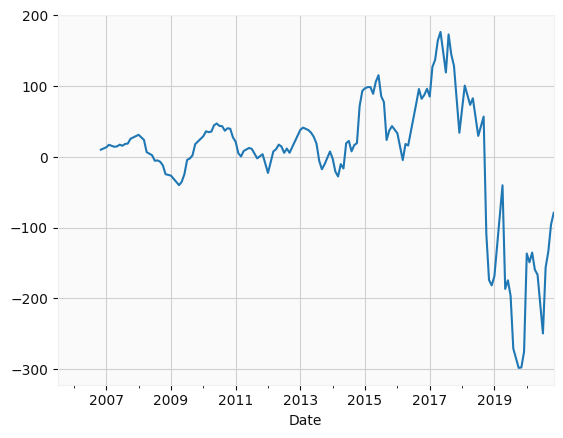

In [43]:
df['Seasonal First Difference'].plot()

## ***6. Feature Engineering & Data Pre-processing***

In [44]:
df.head()

,Open,High,Low,Close,range,gain,loss,candle_length,wicks_length,%_wicks_length,...,MACD,MACD_signal,ema_gain,ema_loss,rs,rsi_14,atr_14,upper_bb,lower_bb,Seasonal First Difference
Date,,,,,,,,,,,,,,,,,,,,,
2005-07-01,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,13.00,14.00,11.25,12.46,2.75,0.00,0.54,0.54,2.21,80.363636,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-01,12.58,14.88,12.55,13.42,2.33,0.84,0.00,0.84,1.49,63.948498,...,0.076581,0.015316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-01,13.48,14.87,12.27,13.30,2.60,0.00,0.18,0.18,2.42,93.076923,...,0.126135,0.037480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-11-01,13.20,14.47,12.40,12.99,2.07,0.00,0.21,0.21,1.86,89.855072,...,0.138793,0.057743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's drop the columns we don't need for machine learning

In [45]:
# dropping unnecesary columns
df.drop(columns = ['gain','loss','rs','ema_gain','ema_loss','candle_length','wicks_length','%_wicks_length'],inplace=True)

In [46]:
df.describe()

,Open,High,Low,Close,range,sma_2,sma_5,sma_7,sma_10,sma_20,MACD,MACD_signal,rsi_14,atr_14,upper_bb,lower_bb,Seasonal First Difference
count,184.000000,184.000000,184.000000,184.000000,184.000000,183.000000,180.000000,178.000000,175.000000,165.000000,184.000000,184.000000,172.000000,171.000000,165.000000,165.000000,169.000000
mean,106.047554,116.654348,95.397500,105.696739,21.256848,106.206339,107.757211,108.789077,110.333309,115.079673,4.613487,5.831341,55.970895,22.268563,175.888788,54.270558,1.649231
std,98.909042,106.359416,91.262484,98.624095,23.476994,98.110171,96.930110,96.246027,95.311811,91.468926,23.265438,20.010506,20.219229,17.916289,134.062185,67.985410,89.809039
min,10.000000,11.240000,5.550000,9.980000,1.000000,10.120000,11.954000,12.685714,15.031000,18.514000,-61.893724,-56.617094,19.323674,2.975714,29.538360,-73.213570,-298.150000
25%,33.867500,36.320000,28.877500,33.495000,7.145000,33.297500,36.240000,38.225357,39.462500,37.552000,0.651942,1.110581,38.153187,10.073929,70.575941,9.482315,-7.730000
50%,62.990000,72.870000,58.210000,62.720000,13.575000,65.630000,65.580000,65.303571,68.987000,78.775500,5.470370,5.228458,57.409207,16.935000,109.541946,44.785378,16.230000
75%,153.350000,170.092500,139.195000,153.617500,25.905000,153.925000,158.822000,159.042143,159.643500,169.787000,12.775943,14.820786,73.080677,28.978214,271.672046,94.723297,40.010000
max,369.950000,404.000000,345.500000,367.900000,183.850000,356.555000,351.830000,342.478571,336.260000,326.221500,48.371101,42.778886,91.958897,71.321429,439.038234,270.472604,176.760000


In [47]:
# checking for null values
df.isna().value_counts()

Open   High   Low    Close  range  sma_2  sma_5  sma_7  sma_10  sma_20  MACD   MACD_signal  rsi_14  atr_14  upper_bb  lower_bb  Seasonal First Difference
False  False  False  False  False  False  False  False  False   False   False  False        False   False   False     False     False                        165
                                                                True    False  False        False   False   True      True      False                          4
                                                                                            True    True    True      True      True                           3
                                                        True    True    False  False        True    True    True      True      True                           3
                                          True   True   True    True    False  False        True    True    True      True      True                           3
                                         

There are too many null values in the dataset after adding more features

In [48]:
# as we have null values in rsi_14,atr_14,sma_20,upper_bb,lower_bb and the columns of variousmoving averages let us fill those with mean value of that column
feature = df.describe()
for col in feature:
  df[col].fillna(df[col].mean(),inplace = True)
#checking updated dataframe
df

,Open,High,Low,Close,range,sma_2,sma_5,sma_7,sma_10,sma_20,MACD,MACD_signal,rsi_14,atr_14,upper_bb,lower_bb,Seasonal First Difference
Date,,,,,,,,,,,,,,,,,
2005-07-01,106.047554,116.654348,95.3975,105.696739,21.256848,106.206339,107.757211,108.789077,110.333309,115.079673,4.613487,5.831341,55.970895,22.268563,175.888788,54.270558,1.649231
2005-08-01,13.000000,14.000000,11.2500,12.460000,2.750000,106.206339,107.757211,108.789077,110.333309,115.079673,0.000000,0.000000,55.970895,22.268563,175.888788,54.270558,1.649231
2005-09-01,12.580000,14.880000,12.5500,13.420000,2.330000,12.940000,107.757211,108.789077,110.333309,115.079673,0.076581,0.015316,55.970895,22.268563,175.888788,54.270558,1.649231
2005-10-01,13.480000,14.870000,12.2700,13.300000,2.600000,13.360000,107.757211,108.789077,110.333309,115.079673,0.126135,0.037480,55.970895,22.268563,175.888788,54.270558,1.649231
2005-11-01,13.200000,14.470000,12.4000,12.990000,2.070000,13.145000,107.757211,108.789077,110.333309,115.079673,0.138793,0.057743,55.970895,22.268563,175.888788,54.270558,1.649231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,27.750000,31.950000,25.5500,25.600000,6.400000,26.225000,27.480000,31.935714,40.375000,101.557500,-59.463835,-55.753045,25.297768,29.782143,257.250356,-54.135356,-249.450000
2020-08-01,25.600000,28.300000,11.1000,11.950000,17.200000,18.775000,22.960000,26.935714,37.425000,93.672500,-58.885129,-56.379462,22.112874,27.796429,250.811870,-63.466870,-156.050000
2020-09-01,12.000000,17.160000,11.8500,14.370000,5.310000,13.160000,21.344000,23.388571,31.817000,85.303500,-57.567624,-56.617094,24.029001,24.243571,240.508729,-69.901729,-133.580000


Dropping the null values would have resulted in a significant loss of data as we only had 185 rows, that's why the null values are replaced by the mean of those columns.

#### Creating a evaluation metric -  "backtest"

In [49]:
# defining a function to check how much accurate is our model and will it be making or loosing money if we traded according to this
def backtest(opens, closes, preds, start = 1000,threshold = 0):
  account = start  # starting amount in the books
  changes = []     # array of how much the price is changing 

  for i in range(len(preds)):
    if (preds[i]-opens[i])/opens[i] >=threshold:   # we will only make trades if the predicted change is greater than or equal to our threshold change
      account += account*((closes[i]-opens[i])/opens[i])  # amount will be changed simultaneously as we go along and make trades
    changes.append(account)                            # with each trade, either loss or profit the initial principle will change      
  changes = np.array(changes)                          # converting changes to an array
  percent_changed = ((account-start)/start)*100
  print(f'Net Change percentage : {percent_changed}%')

  plt.plot(range(len(changes)),changes)                # plotting the changes in our book
  plt.show()


The function *backtest* is defined to check if our model would make any money on the testing data.

#### Creating training and testing data for all the models

In [50]:
# defining our x and y values
y = df['Close']
x = df.drop(columns = ['Close'])

# defining our training and testing data
num_test = 36
num_train = int(len(df)) - num_test
x_train = x[:-1*num_test]
y_train = y[:-1*num_test]
x_test= x[-1*num_test:]
y_test= y[-1*num_test:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(149, 16) (149,) (36, 16) (36,)


We cannot use train_test_split() as it randomly selects the data, which is not a real life scenario, we will always have the past prices to predict the future's prices, never the other way around

## ***7. ML Model Implementation***

####Linear Regression Model

In [51]:
#Importing our model from library
from sklearn.linear_model import LinearRegression

# defining model
model = LinearRegression()
model = model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [52]:
print(model.score(x_train, y_train))
print(model.score(x_test,y_test))

0.9979714438929199
0.9850884091134426


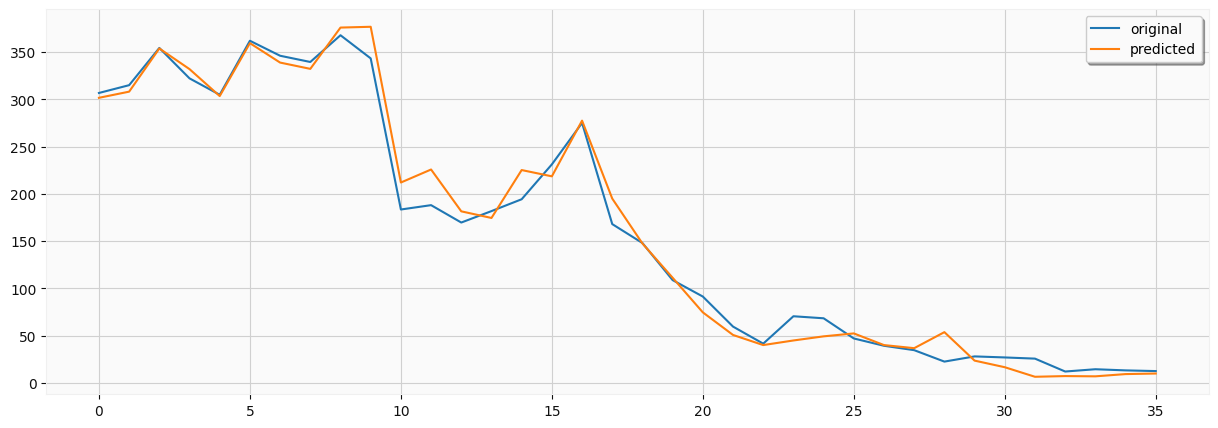

In [53]:
# Comparing predicted price with the actual price
plt.figure(figsize=(15,5))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

We can see that our predicted prices are somewhere close to actual prices.

Threshold: 0 %
Net Change percentage : 195.29212874208267%


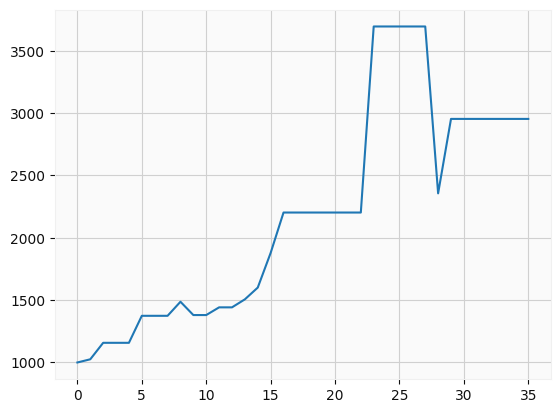

Threshold: 1.0 %
Net Change percentage : 175.6566200683814%


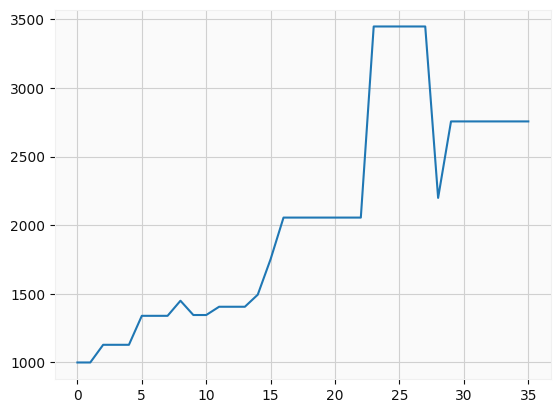

Threshold: 2.0 %
Net Change percentage : 196.9690349280655%


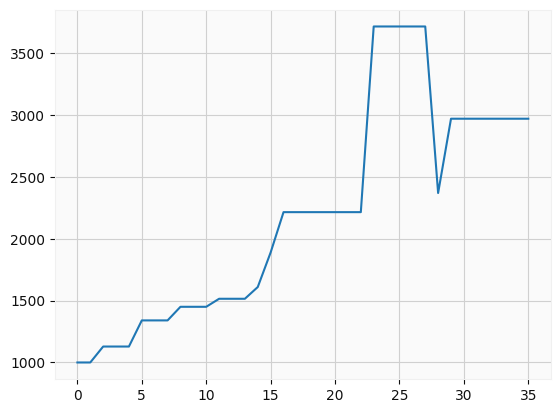

Threshold: 3.0 %
Net Change percentage : 196.9690349280655%


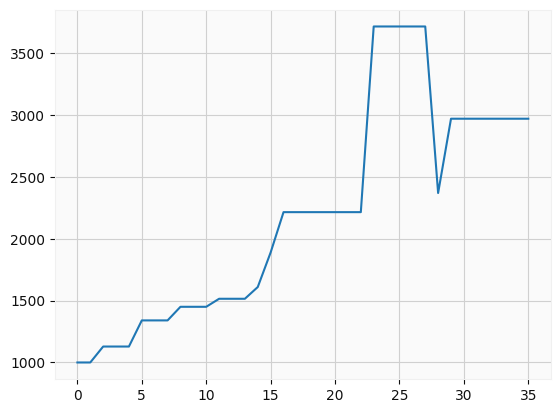

Threshold: 4.0 %
Net Change percentage : 196.9690349280655%


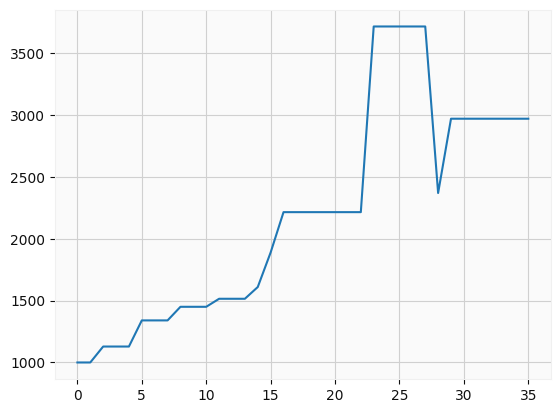

Threshold: 5.0 %
Net Change percentage : 196.9690349280655%


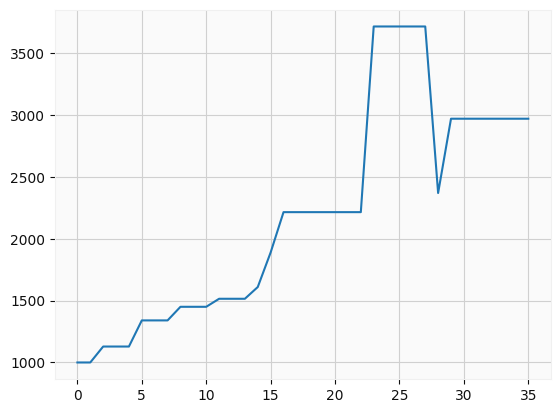

Threshold: 6.0 %
Net Change percentage : 136.93772733080004%


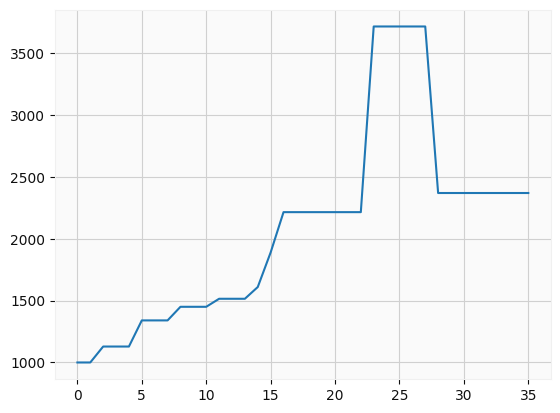

Threshold: 7.000000000000001 %
Net Change percentage : 41.25457129728322%


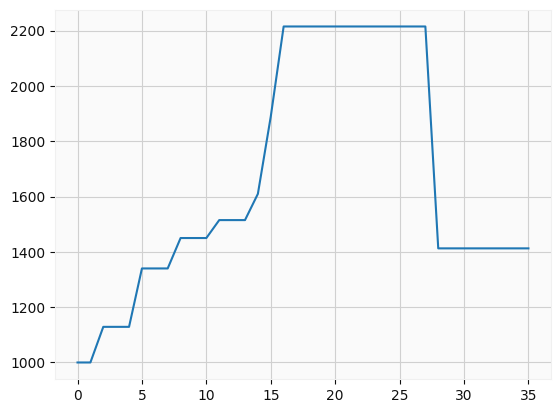

Threshold: 8.0 %
Net Change percentage : 41.25457129728322%


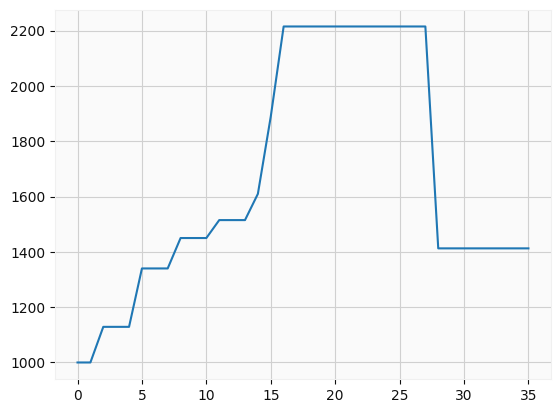

Threshold: 9.0 %
Net Change percentage : 41.25457129728322%


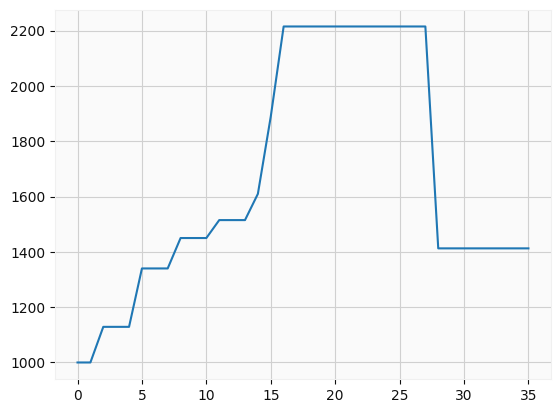

Threshold: 10.0 %
Net Change percentage : 41.25457129728322%


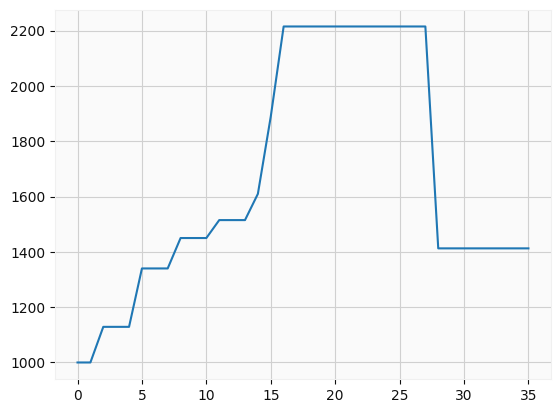

In [54]:
# checking our account balance if we made trade, everytime our model predicted that the price will go up by atleast 1 to 10 %
for i in [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]:
  print(f'Threshold: {i*100} %')
  backtest(np.array(x_test).T[0],y_test,y_pred,1000,i)

As we increase our threshold percencentage(only above which we will make trades) our profit is decreasing, i.e. it is giving us less trades

####Decision Tree model

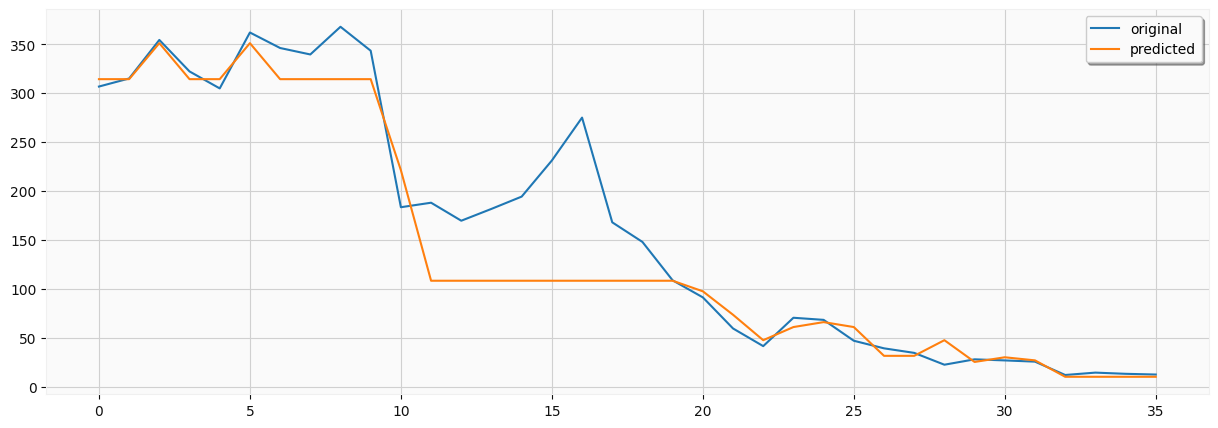

In [55]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_leaf_nodes=100,random_state = 0)
dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)

plt.figure(figsize=(15,5))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   

Text(0.5, 0, 'Feature Importance')

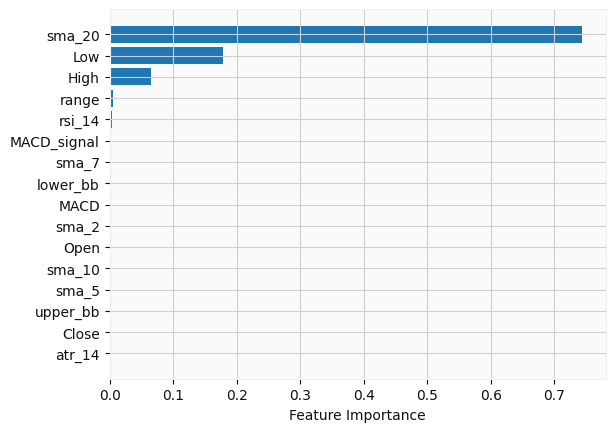

In [56]:
# Checking feature importance in the model
column_name = df.columns
sort = dtr.feature_importances_.argsort()
plt.barh(column_name[sort], dtr.feature_importances_[sort])
plt.xlabel("Feature Importance")

We can see that 20 and 7 monthly moving averages were given the most prefernece for this output 

Threshold: 0 %
Net Change percentage : 77.96481598733482%


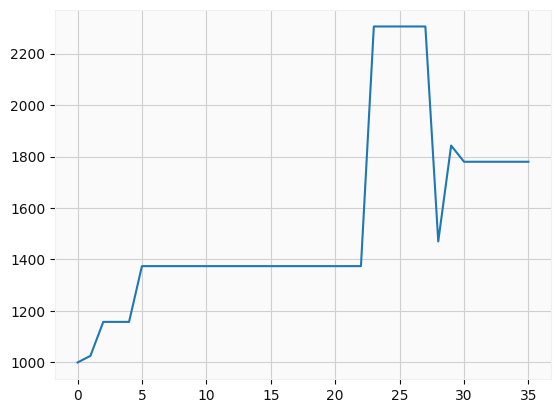

Threshold: 1.0 %
Net Change percentage : 77.96481598733482%


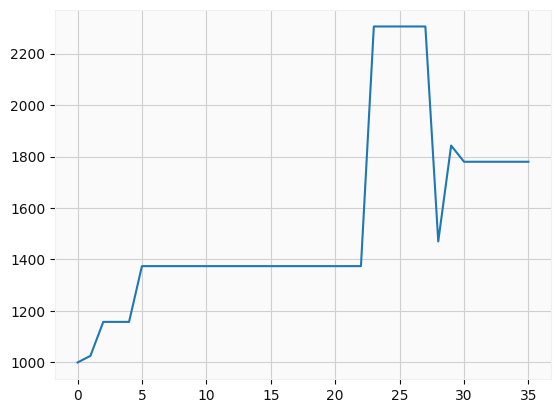

Threshold: 2.0 %
Net Change percentage : 77.96481598733482%


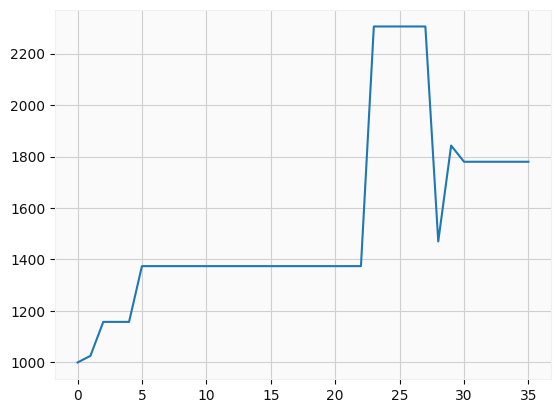

Threshold: 3.0 %
Net Change percentage : 73.53052363532538%


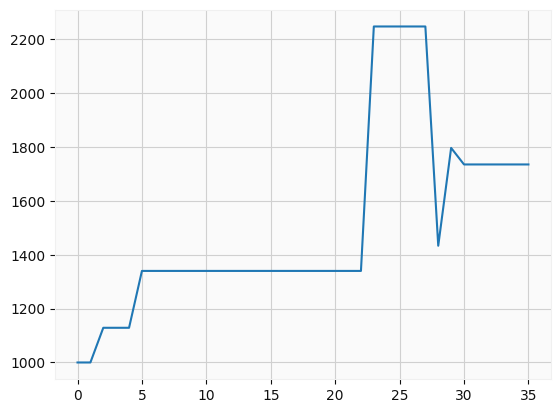

Threshold: 4.0 %
Net Change percentage : 73.53052363532538%


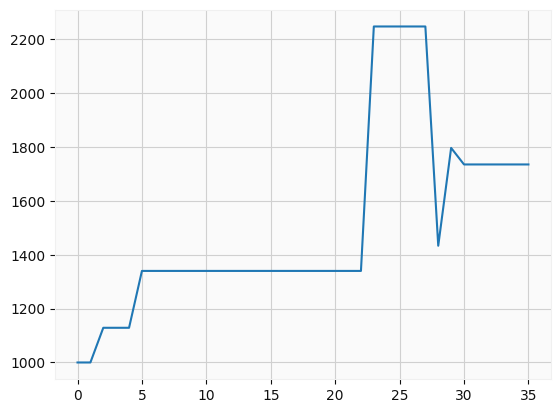

Threshold: 5.0 %
Net Change percentage : 73.53052363532538%


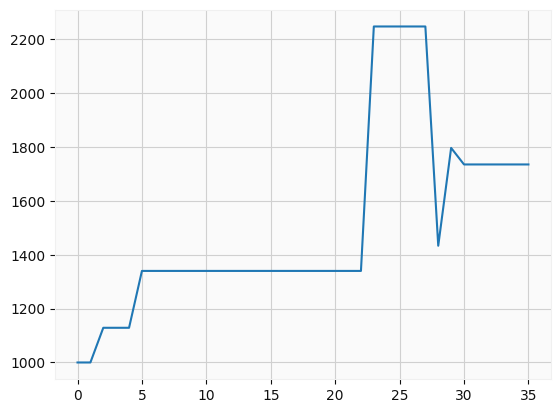

Threshold: 6.0 %
Net Change percentage : 73.53052363532538%


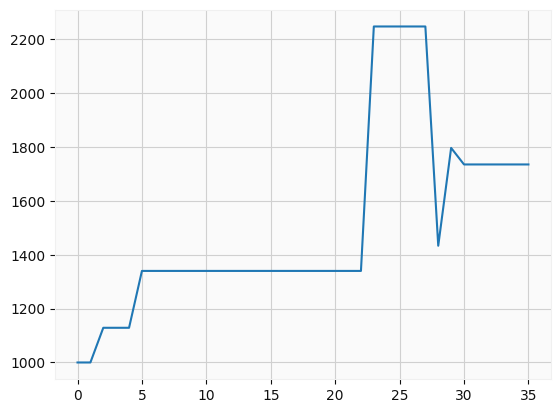

Threshold: 7.000000000000001 %
Net Change percentage : 73.53052363532538%


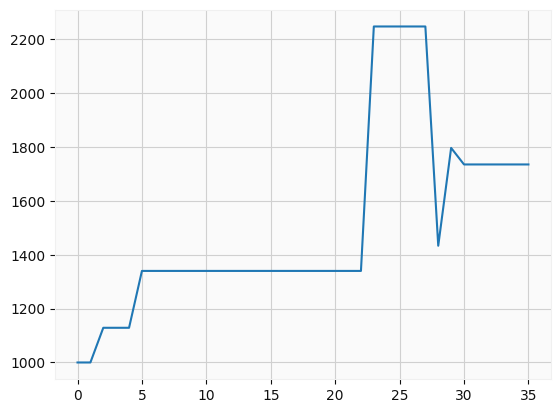

Threshold: 8.0 %
Net Change percentage : 73.53052363532538%


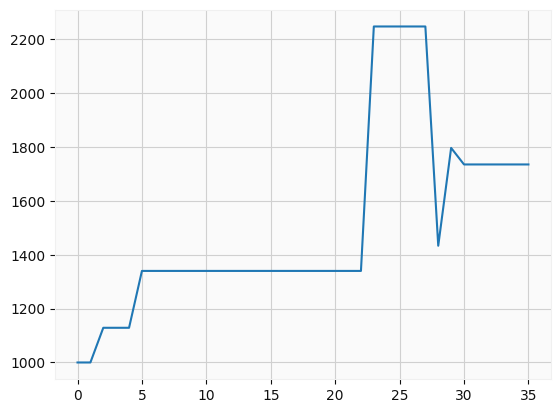

Threshold: 9.0 %
Net Change percentage : 79.67033732074657%


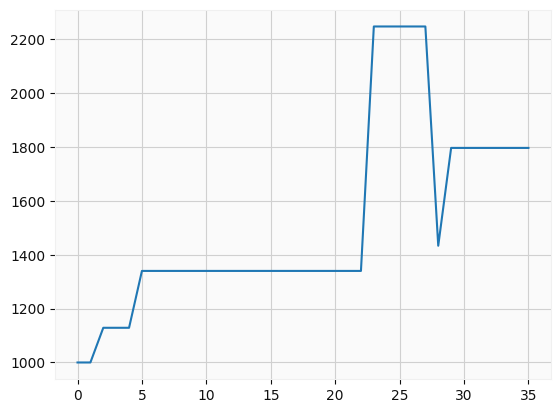

Threshold: 10.0 %
Net Change percentage : 79.67033732074657%


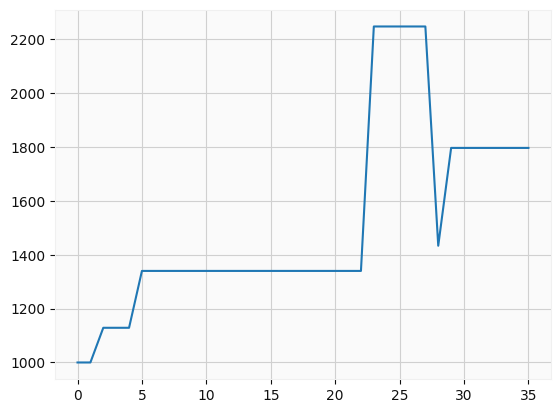

In [57]:
# checking our account balance if we made trade, everytime our model predicted that the price will go up by atleast 1 to 10 %
for i in [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]:
  print(f'Threshold: {i*100} %')
  backtest(np.array(x_test).T[0],y_test,y_pred,1000,i)

WE can see that our model's performance is worst when we put the threshold inbetween 3-8 % and it is at its peak in 9 and 10 % with 90% profit gain

#### Random Forest Model

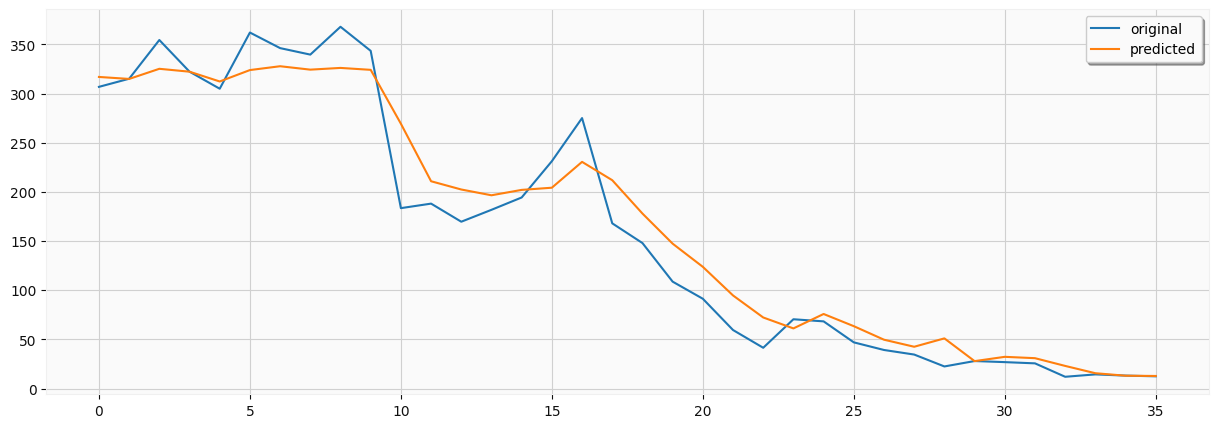

In [58]:
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
# fit the regressor with training data
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

plt.figure(figsize=(15,5))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   

Text(0.5, 0, 'Feature Importance')

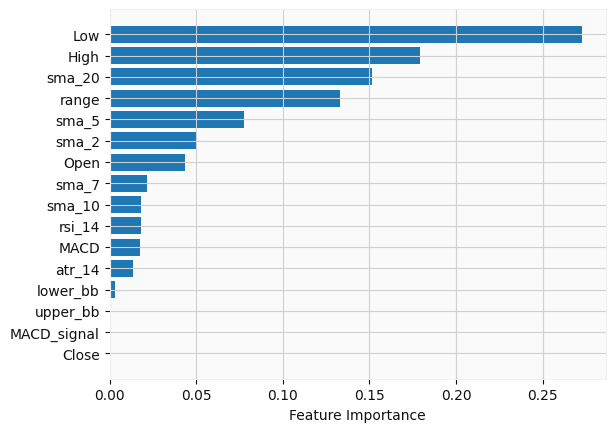

In [59]:
# Checking feature importance in the model
column_name = df.columns
sort = regressor.feature_importances_.argsort()
plt.barh(column_name[sort], regressor.feature_importances_[sort])
plt.xlabel("Feature Importance")

A lot of indicators we passed are taken into imporance to take the judgements here

Threshold: 0 %
Net Change percentage : -42.71824935054561%


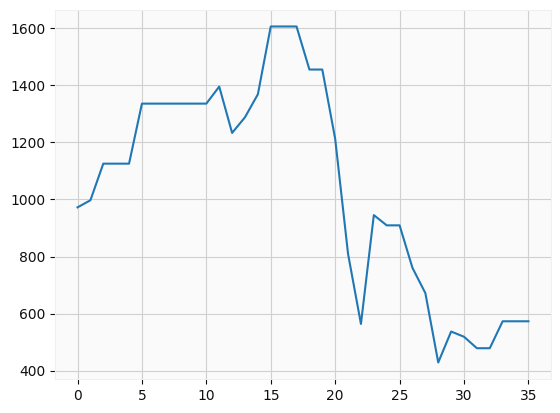

Threshold: 1.0 %
Net Change percentage : -41.093897229782065%


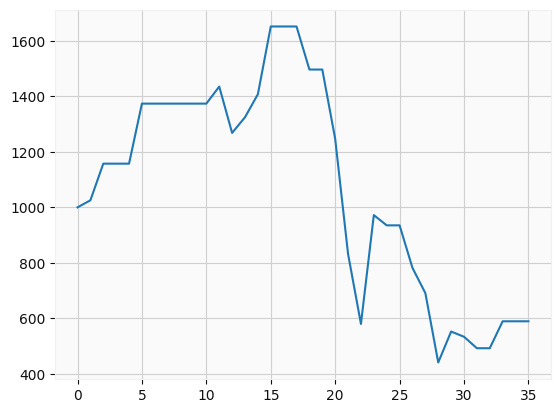

Threshold: 2.0 %
Net Change percentage : -41.093897229782065%


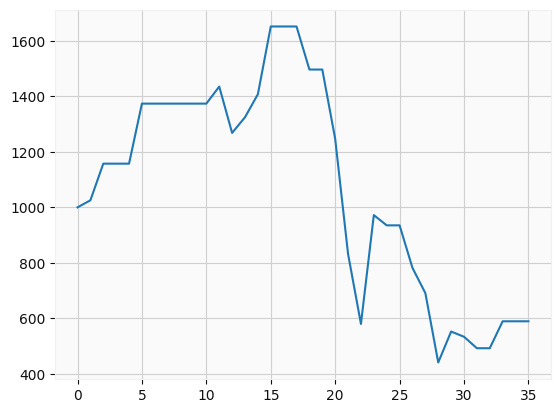

Threshold: 3.0 %
Net Change percentage : -42.5616417361976%


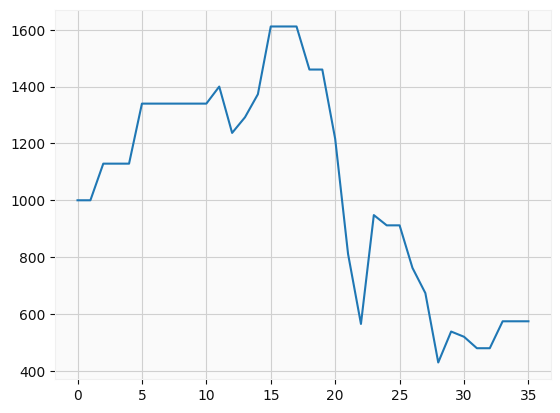

Threshold: 4.0 %
Net Change percentage : -56.64341355555137%


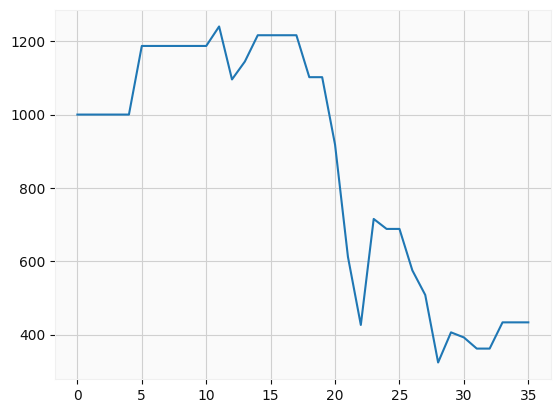

Threshold: 5.0 %
Net Change percentage : -56.64341355555137%


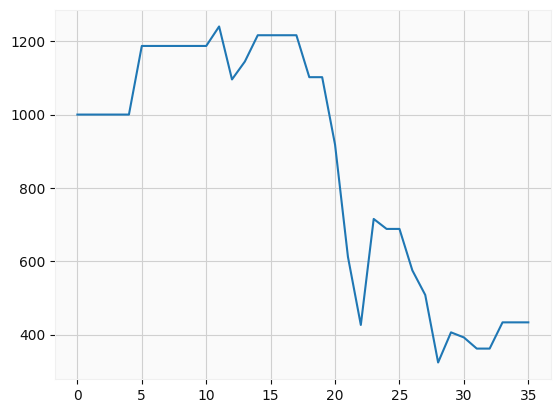

Threshold: 6.0 %
Net Change percentage : -41.293089972907765%


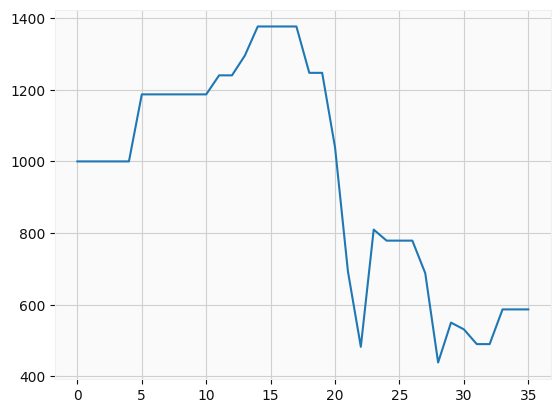

Threshold: 7.000000000000001 %
Net Change percentage : -22.926329218372622%


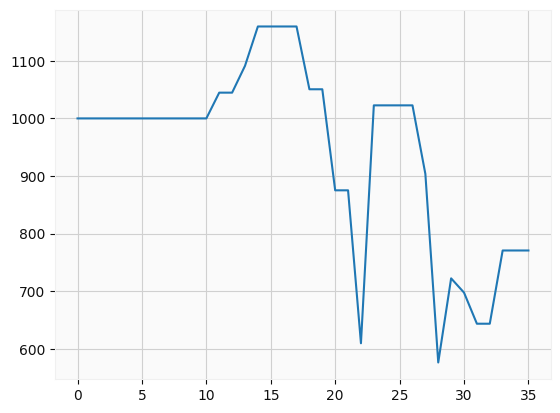

Threshold: 8.0 %
Net Change percentage : -22.926329218372622%


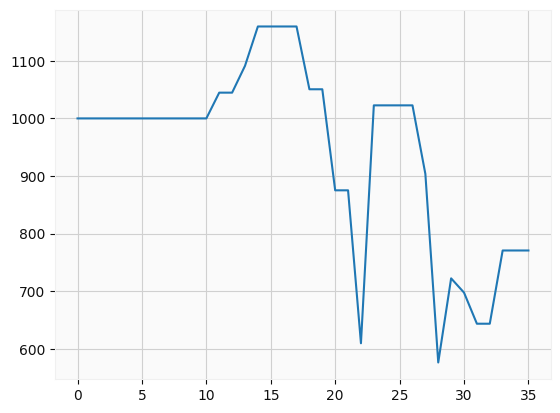

Threshold: 9.0 %
Net Change percentage : -3.7266765132518573%


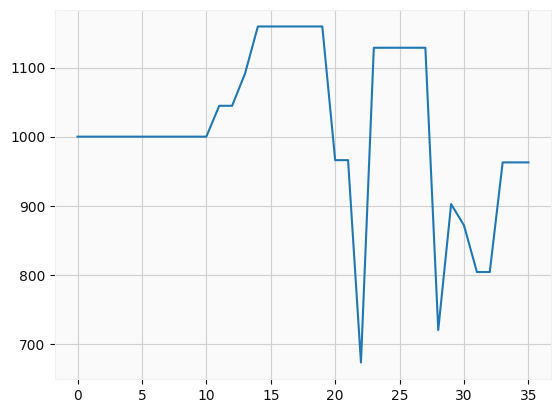

Threshold: 10.0 %
Net Change percentage : -3.7266765132518573%


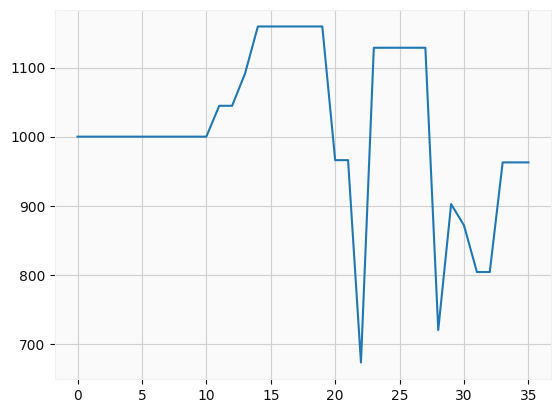

In [60]:
# checking our account balance if we made trade, everytime our model predicted that the price will go up by atleast 1 to 10 %
for i in [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]:
  print(f'Threshold: {i*100} %')
  backtest(np.array(x_test).T[0],y_test,y_pred,1000,i)

Although this is surely not a good model as it s loosing us money but we can see that threshold can be optimized to both increase our gains and decrease our losses

#### Extreme Gradient Boost Model




[19:55:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


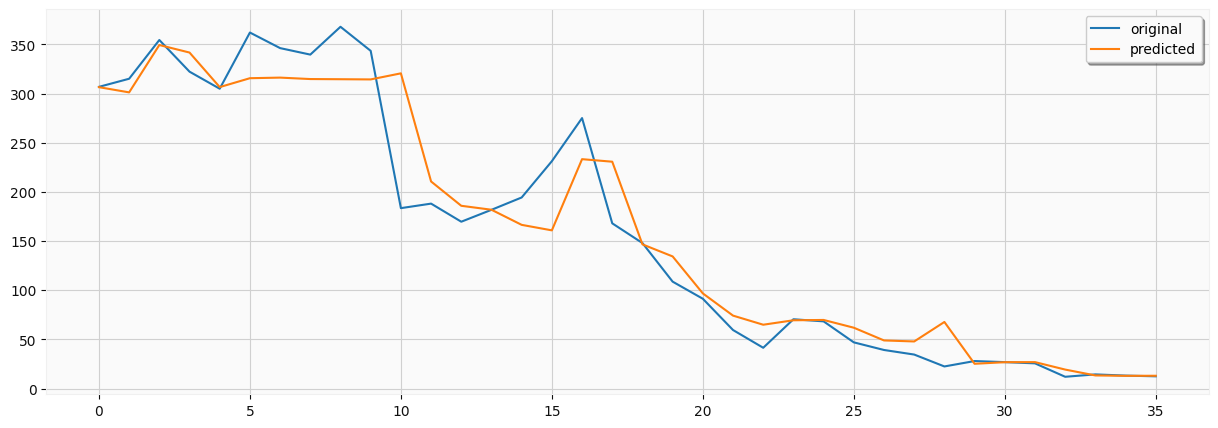

In [61]:
# Necessary imports
import xgboost as xg


# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
				n_estimators = 1000)

# Fitting the model
xgb_r.fit(x_train, y_train)

# Predict the model
y_pred = xgb_r.predict(x_test)

plt.figure(figsize=(15,5))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   

<Axes: >

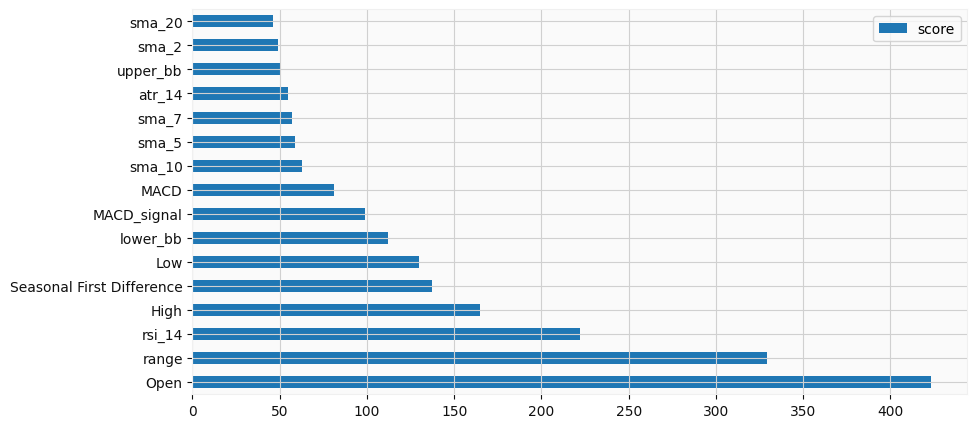

In [62]:
# Feature importance in XGBoost Model
feature_important = xgb_r.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (10,5))

This model used all the features passed with a decent score

Threshold: 0 %
Net Change percentage : 20.8008518861217%


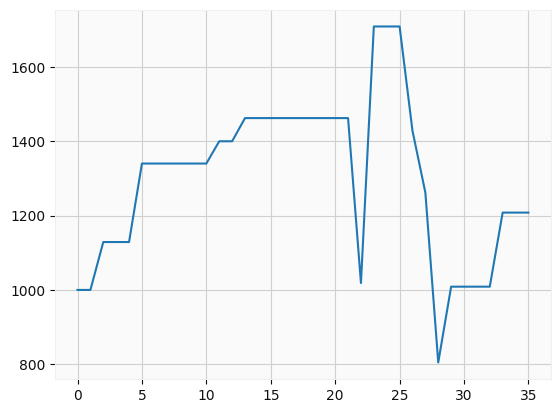

Threshold: 1.0 %
Net Change percentage : 20.8008518861217%


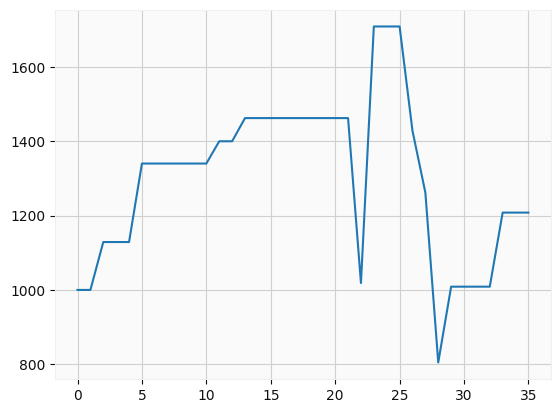

Threshold: 2.0 %
Net Change percentage : 20.8008518861217%


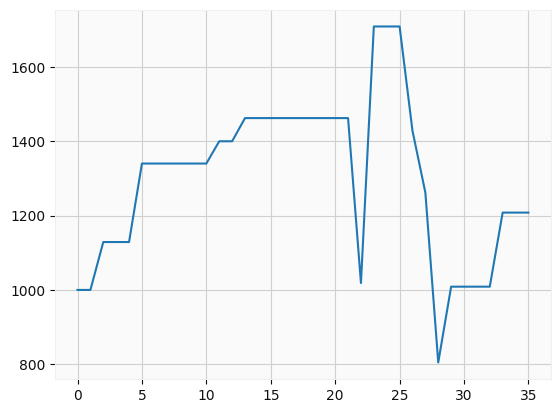

Threshold: 3.0 %
Net Change percentage : 20.8008518861217%


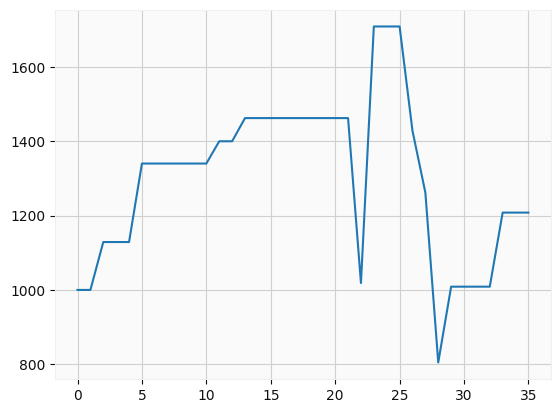

Threshold: 4.0 %
Net Change percentage : 1.7656672428314095%


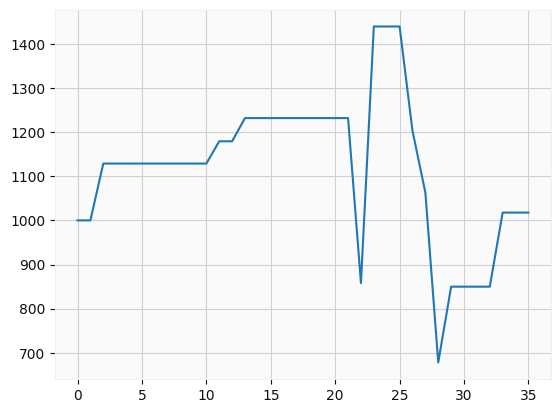

Threshold: 5.0 %
Net Change percentage : 16.563583092643785%


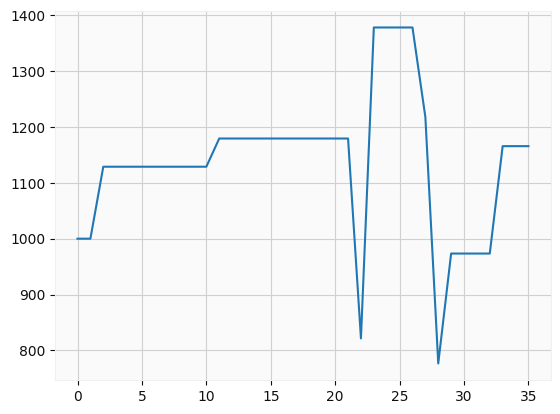

Threshold: 6.0 %
Net Change percentage : 16.563583092643785%


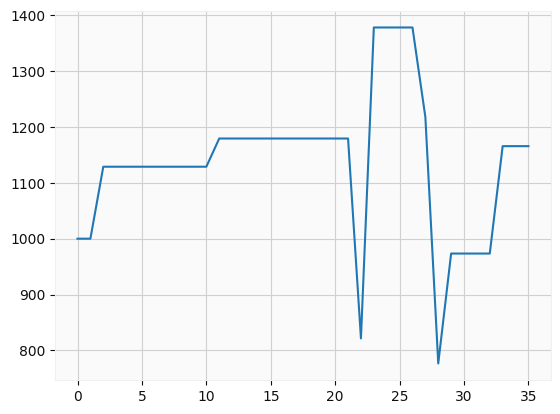

Threshold: 7.000000000000001 %
Net Change percentage : 16.563583092643785%


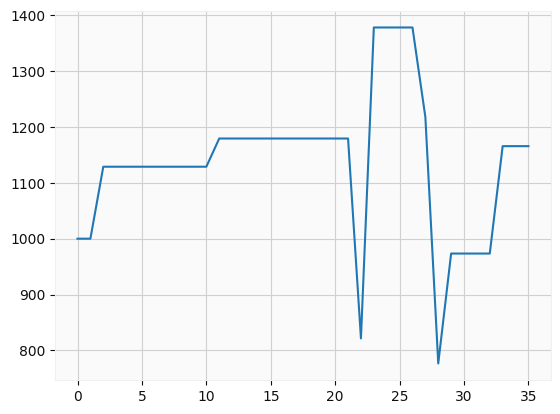

Threshold: 8.0 %
Net Change percentage : 16.563583092643785%


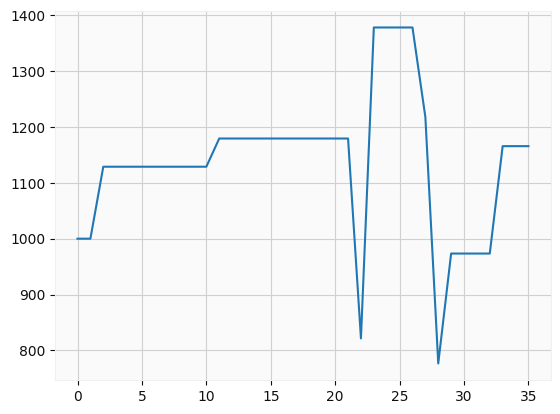

Threshold: 9.0 %
Net Change percentage : 16.563583092643785%


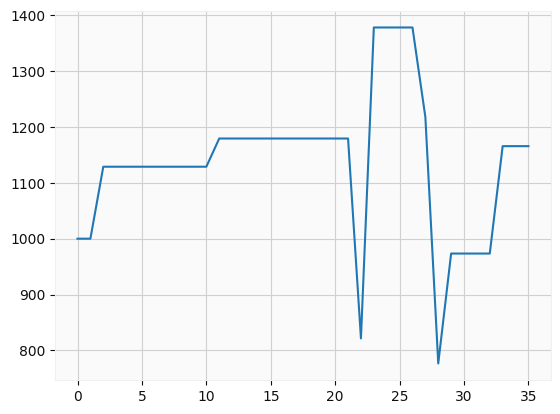

Threshold: 10.0 %
Net Change percentage : 67.32287560946453%


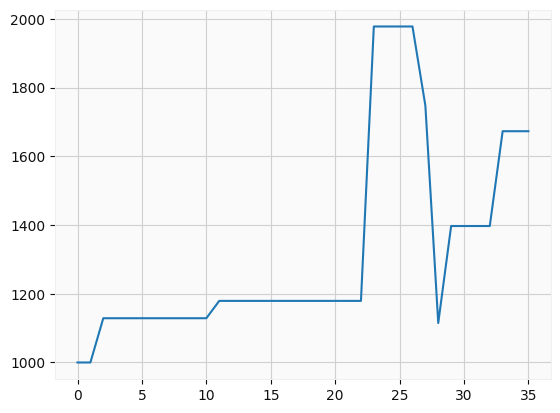

In [63]:
# checking our account balance if we made trade, everytime our model predicted that the price will go up by atleast 1 to 10 %
for i in [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]:
  print(f'Threshold: {i*100} %')
  backtest(np.array(x_test).T[0],y_test,y_pred,1000,i)

From the above chart is clear that the most loss we had made if used this model is 19 % with 4 % threshold, and the most gain would have been 54.4 % with 8 or 9 % threshold

#### SARIMAX

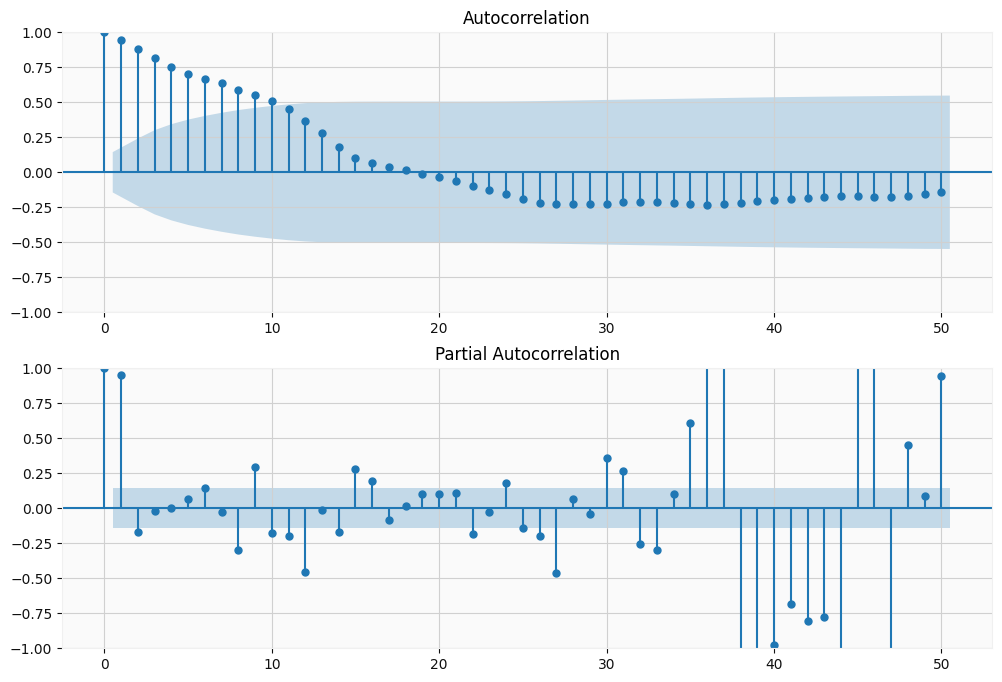

In [64]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=50,ax=ax2)

We can see a sudden shutoff at 2 in the partial autocrrelation graph. Therefore the p value (AR) value = 2

We can see an exponential decrease in autocorrelaton graph. Therefore the MA value or the q value will be 10

As we only shifted once then we will have our difference or the d value as 1

In [65]:
# importing sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMAX model
model= SARIMAX(y_train, 
 exog=x_train,
 order=(2,1,10),
 enforce_invertibility=False, enforce_stationarity=False)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
# fitting the model
results= model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
# predicting the values
y_pred = results.predict(start =num_train, end=num_train+num_test-1,exog=x_test)

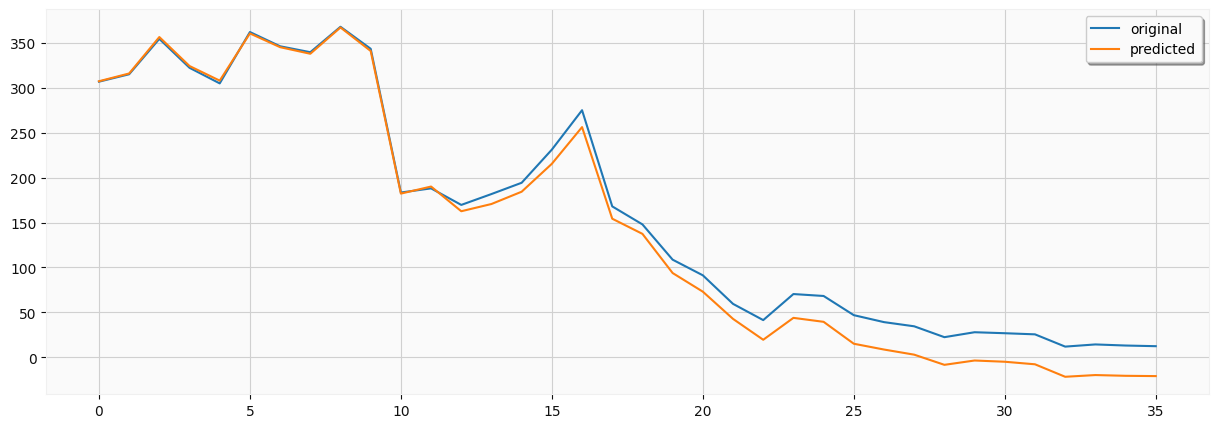

In [68]:
# Comparing predicted price with the actual price
plt.figure(figsize=(15,5))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Threshold: 0 %
Net Change percentage : 280.9945902706266%


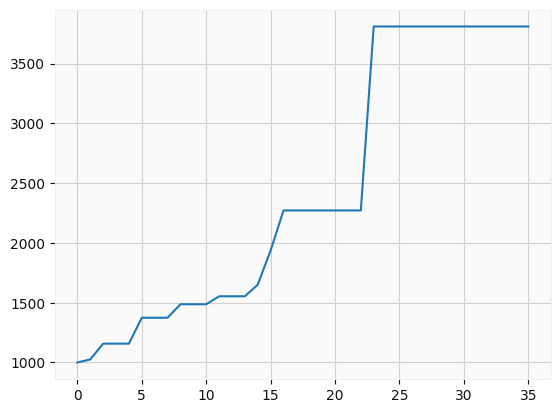

Threshold: 1.0 %
Net Change percentage : 258.54277319085986%


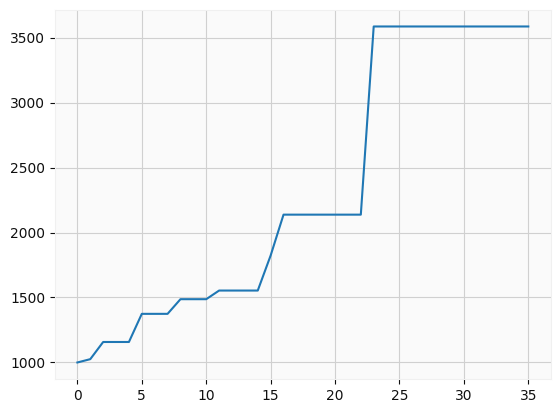

Threshold: 2.0 %
Net Change percentage : 258.54277319085986%


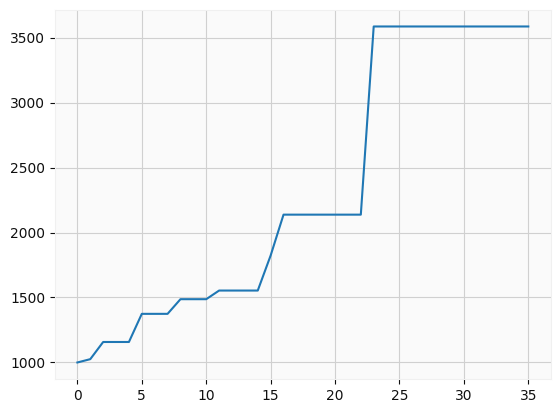

Threshold: 3.0 %
Net Change percentage : 249.60907768364427%


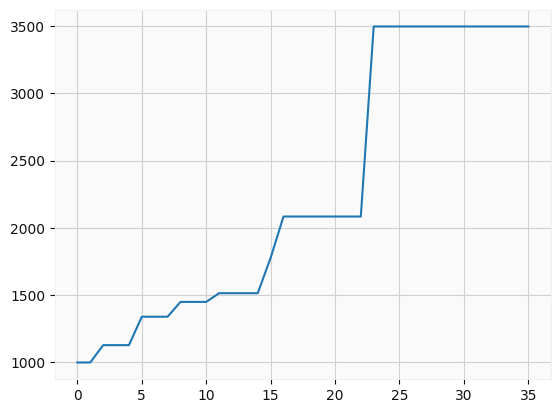

Threshold: 4.0 %
Net Change percentage : 249.60907768364427%


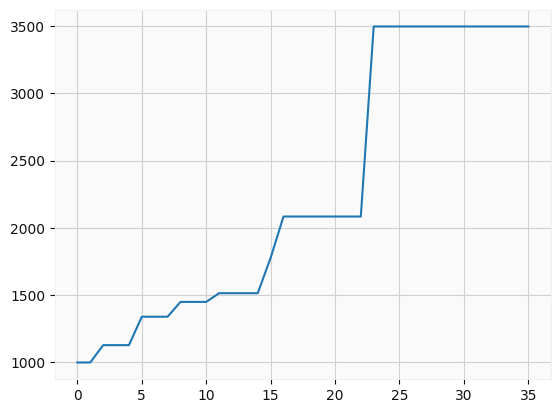

Threshold: 5.0 %
Net Change percentage : 108.42556795902144%


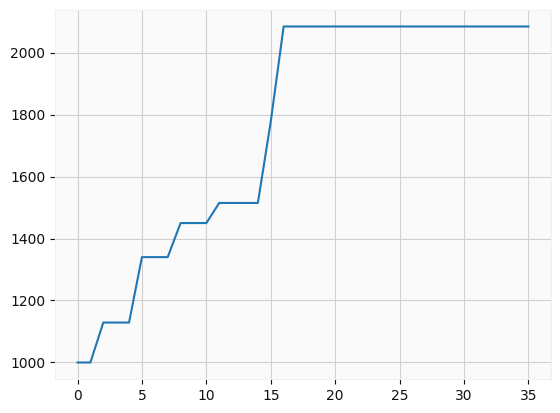

Threshold: 6.0 %
Net Change percentage : 99.50333545665437%


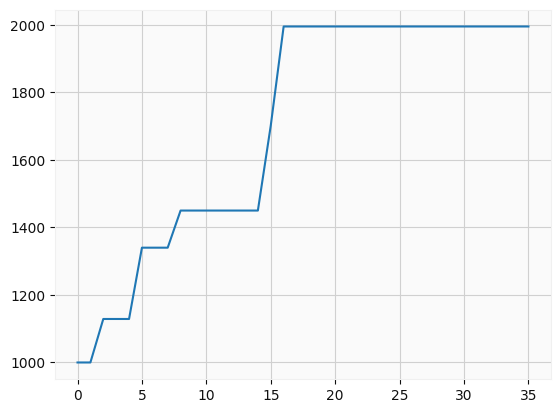

Threshold: 7.000000000000001 %
Net Change percentage : 99.50333545665437%


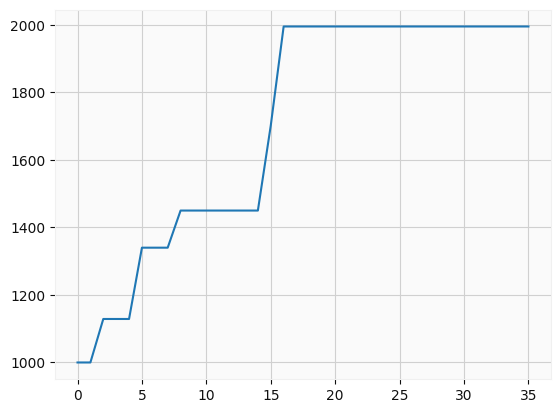

Threshold: 8.0 %
Net Change percentage : 84.3738354315371%


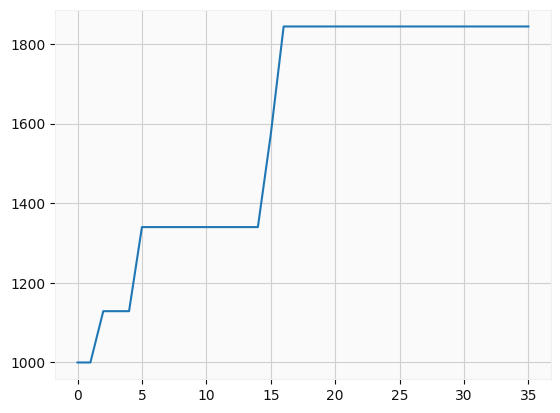

Threshold: 9.0 %
Net Change percentage : 84.3738354315371%


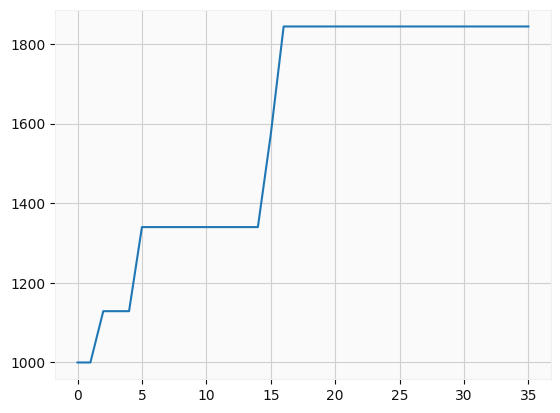

Threshold: 10.0 %
Net Change percentage : 33.99668215516342%


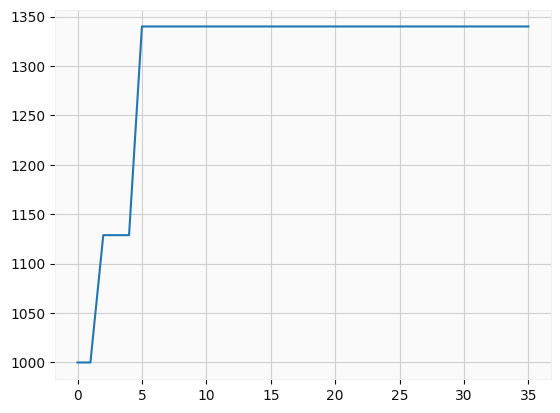

In [69]:
# checking our account balance if we made trade, everytime our model predicted that the price will go up by atleast 1 to 10 %
for i in [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]:
  print(f'Threshold: {i*100} %')
  backtest(np.array(x_test).T[0],y_test,y_pred,1000,i)

In [70]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])

## ***8.*** ***Future Work***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [71]:
# Save the File
model= SARIMAX(y_train, 
 exog=x_train,
 order=(2,1,10),
 enforce_invertibility=False, enforce_stationarity=False)
model = model.fit()
import joblib
joblib.dump(model, 'model_joblib')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['model_joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [72]:
# Load the File and predict unseen data.
from datetime import date
e =[[98.639901,106.070002,91.01415,15.056,97.575506,95.604054,94.397508,92.685636,86.354821,23.202131,19.956055,19.491880,17.221207,14.03285,13.07895,16.79846]]
a = 149
b = 150
joblib_model = joblib.load('model_joblib')
joblib_model.predict(date(2017,12,1),exog = e)


2017-12-01    106.356084
Freq: MS, dtype: float64

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Net change = -96.56895259360807


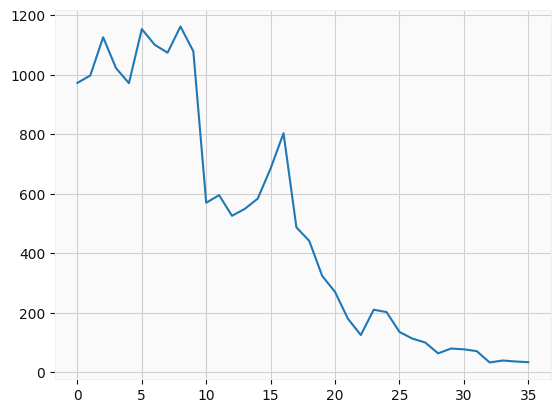

In [73]:
opens = np.array(x_test).T[0]
closes = y_test
start = 1000
changes = []
for i in range(num_test):
  percent_change = (closes[i] - opens[i])/opens[i]
  account = start*percent_change
  start = start + account
  changes.append(start)
print(f'Net change = {100*((changes[-1] - 1000)/1000)}')
plt.plot(changes)
plt.show()

The following graph shows that what would have happen to the initial amount of 1000 if we bought Yes Bank's stocks at the open price of every month and sold at the close prce of every month for the last 35 months, we would be in a loss of 96.5%

From the EDA it was quiet clear that the prices were heavly manipulated by fundamental factors or any kind of FUD that might be circulating in the market and the media houses

Despite of the fact that few of our model's gave losses, it is still not as huge as what regular trading would have done to our capital. 